In [1]:
import numpy as np
import pandas as pd
import torch
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from IPython import display
import random
import scipy.stats
from sklearn import metrics
from sklearn.metrics import roc_curve
import os
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster## Fidelity Analysis
from sklearn.cluster import KMeans

import timm
import torchvision
from torchvision.transforms.functional import gaussian_blur
from torch.utils.data import Subset
import torch.nn.functional as F
import matplotlib.pyplot as plt

# CIFAR-10 (Hierarchical)

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.5          0.0        0.275799  0.026089        126.0  28.044607   
0.6          0.0        0.227551  0.014972        175.2  19.175505   
0.7          0.0        0.199343  0.012311        211.8   5.805170   
2.0          1.0        0.247874  0.028979         75.8   6.140033   
             2.0        0.266696  0.026571         78.6  13.240091   
             8.0        0.221476  0.025204        100.4  14.046352   
2.5          0.5        0.203589  0.019198        108.4  11.013628   
             1.0        0.197291  0.014044        122.0  10.024969   
             2.0        0.198998  0.016416        121.8  11.734564   
             8.0        0.192383  0.014722        145.0  12.041595   
3.0          0.5        0.171049  0.009984        154.0   9.513149   
             1.0    

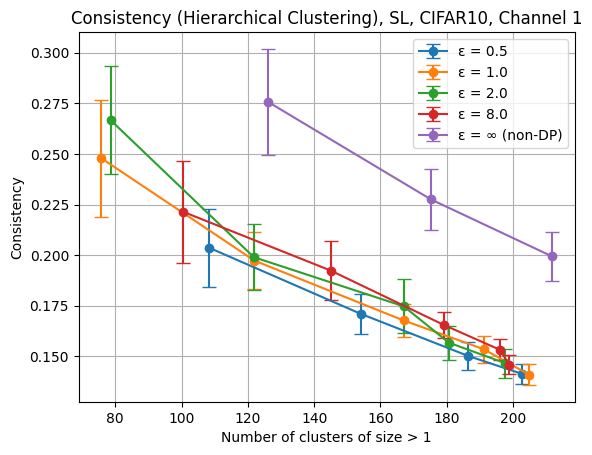

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.6          0.0        0.281787  0.013495        108.4  36.480132   
0.7          0.0        0.241506  0.024378        156.0  28.442925   
2.5          1.0        0.275195  0.032607         67.6   5.856620   
             2.0        0.272719  0.041033         68.8   9.391486   
             8.0        0.233168  0.020949         91.8   9.884331   
3.0          0.5        0.223558  0.024032        100.2  12.577758   
             1.0        0.212986  0.022128        115.4  10.261579   
             2.0        0.220965  0.023623        119.0  11.811012   
             8.0        0.207127  0.011469        138.4  15.026643   
3.5          0.5        0.189130  0.013501        138.8  15.449919   
             1.0        0.190054  0.008560        152.2  17.035258   
             2.0    

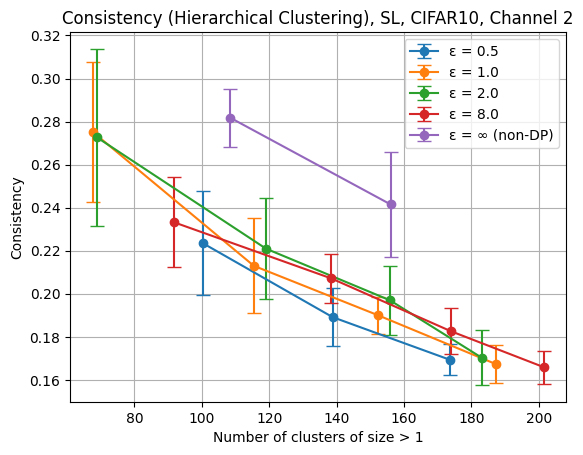

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.4          0.0        0.264933  0.010919        121.6  40.703808   
0.5          0.0        0.213959  0.016348        176.4  17.896927   
0.6          0.0        0.181470  0.016003        225.0  19.065676   
0.7          0.0        0.162493  0.010449        244.8  20.067386   
1.5          8.0        0.246806  0.024718         70.8  16.754104   
2.0          0.5        0.208832  0.024293        100.4  16.195678   
             1.0        0.209730  0.022430        118.4   9.343447   
             2.0        0.211356  0.016047        123.6  15.598077   
             8.0        0.191752  0.008878        138.6  16.682326   
2.5          0.5        0.170456  0.011378        156.4  18.049931   
             1.0        0.167986  0.008593        165.8  17.810109   
             2.0    

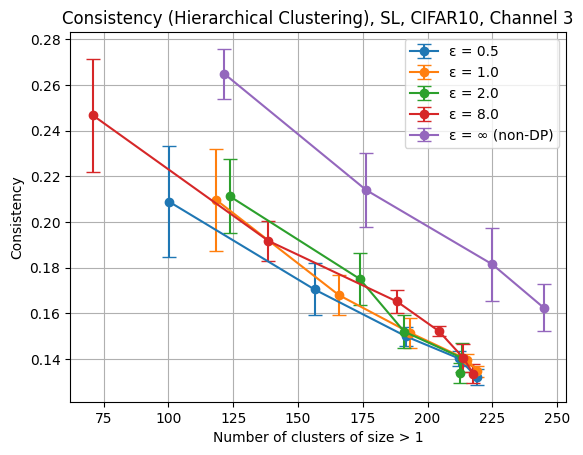

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.6          0.0        0.215622  0.020133         54.6  10.014989   
0.7          0.0        0.206074  0.020136         83.4  15.453155   
3.0          0.5        0.239758  0.026585         68.4  11.104053   
             1.0        0.225020  0.008285         63.0   6.964194   
             2.0        0.203125  0.020925         53.4  13.939153   
             8.0        0.210944  0.011502         52.2   7.155418   
3.5          0.5        0.207073  0.018249         94.2   9.391486   
             1.0        0.209710  0.004271         97.0   8.396428   
             2.0        0.200362  0.015719         84.4  18.460769   
             8.0        0.207383  0.023414         78.0   8.000000   
4.0          0.5        0.186383  0.016365        124.4  13.277801   
             1.0    

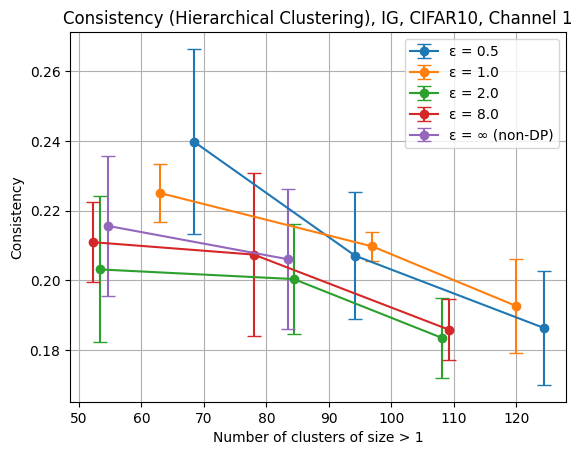

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
3.5          0.5        0.251729  0.031339         52.4   6.841053   
             1.0        0.244922  0.023748         50.0   5.830952   
4.0          0.5        0.228556  0.013067         82.8  16.664333   
             1.0        0.232658  0.012358         74.6   6.877500   
             2.0        0.203976  0.031381         60.2  14.078352   
             8.0        0.227139  0.021172         61.6   5.412947   

                     num_singles              
                            mean         std  
max_distance epsilon                          
3.5          0.5          9354.6   90.298394  
             1.0          9444.6   50.351763  
4.0          0.5          8877.6  157.650880  
             1.0          9039.4   93.913790  
             2.0          9181.0  117.90

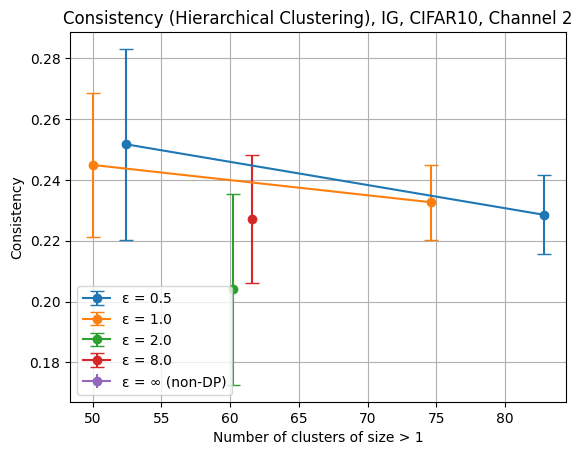

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.5          0.0        0.257836  0.038889         54.8  15.122830   
0.6          0.0        0.233397  0.024115         84.4  22.908514   
0.7          0.0        0.196205  0.012762        100.0  19.608672   
2.5          0.5        0.304873  0.045706         59.6  10.691118   
             1.0        0.295593  0.022907         54.4   7.700649   
3.0          0.5        0.258482  0.023688         95.0  13.638182   
             1.0        0.256755  0.019590         94.6   8.203658   
             2.0        0.243824  0.022764         82.8  15.896541   
             8.0        0.251041  0.015880         75.4   6.426508   
3.5          0.5        0.228288  0.031020        125.4   6.228965   
             1.0        0.223414  0.010177        116.0   6.204837   
             2.0    

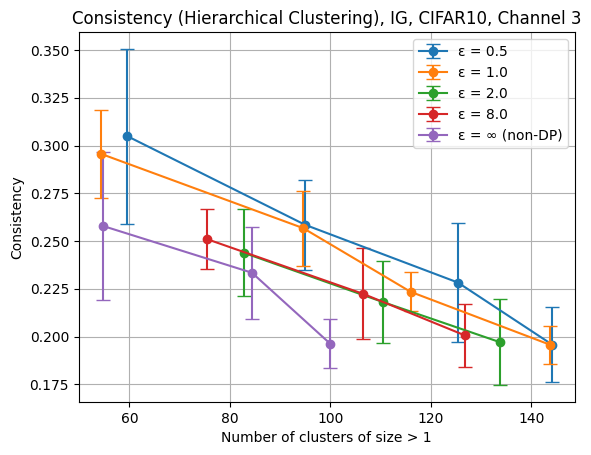

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.3          0.0        0.147522  0.009962        108.4  25.967287   
0.4          0.0        0.126853  0.006581        143.4  41.494578   
0.5          0.0        0.119755  0.008116        152.8  59.196284   
0.6          0.0        0.115070  0.006922        132.4  62.887201   
0.7          0.0        0.111321  0.005998        113.4  62.680140   
1.5          0.5        0.163609  0.016361         69.8   5.848077   
             1.0        0.164677  0.021113         73.4   8.961027   
             2.0        0.164553  0.012510         82.0  12.267844   
             8.0        0.157539  0.007812         94.8   9.011104   
2.0          0.5        0.132093  0.007245        112.6   5.856620   
             1.0        0.133923  0.009591        110.0  13.322913   
             2.0    

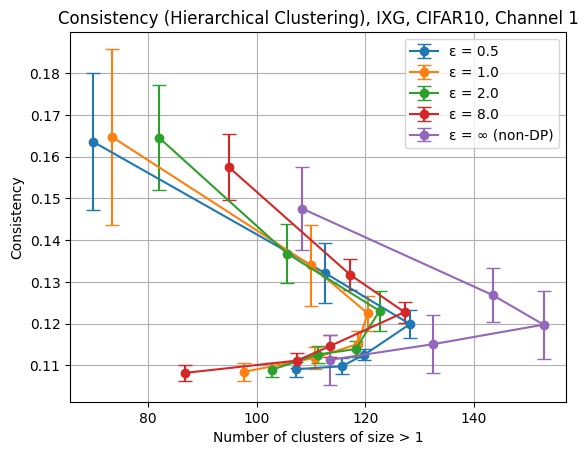

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.3          0.0        0.180848  0.018098         81.0  16.507574   
0.4          0.0        0.140440  0.012458        135.0  38.418745   
0.5          0.0        0.129861  0.012724        161.2  59.103299   
0.6          0.0        0.119611  0.008229        162.2  73.339621   
0.7          0.0        0.114257  0.006750        144.0  74.716129   
1.5          0.5        0.187672  0.055668         43.4   3.049590   
             1.0        0.198826  0.042295         53.2   9.364828   
             2.0        0.200206  0.032065         59.6   7.300685   
             8.0        0.189588  0.014055         69.8  12.255611   
2.0          0.5        0.152082  0.014998         97.6  12.136721   
             1.0        0.155317  0.019325         97.8  14.394443   
             2.0    

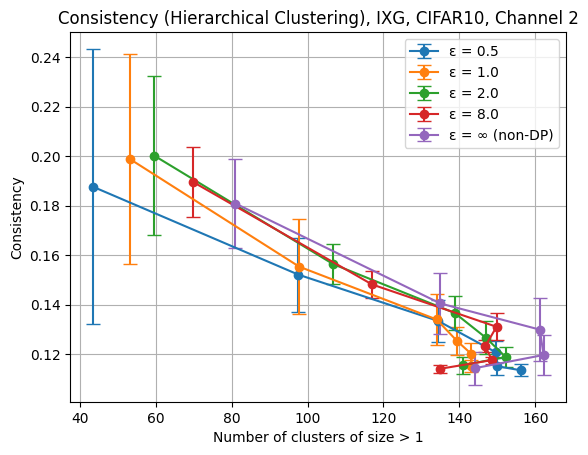

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.3          0.0        0.147253  0.011743        134.2  27.389779   
0.4          0.0        0.126229  0.007759        159.4  50.840928   
0.5          0.0        0.116972  0.005096        142.0  60.638272   
0.6          0.0        0.112658  0.004455        123.2  54.595787   
0.7          0.0        0.108605  0.002601        102.6  50.292147   
1.5          0.5        0.146547  0.015305         90.2   4.816638   
             1.0        0.149003  0.014028         96.4  10.334409   
             2.0        0.150532  0.009813         98.0   8.602325   
             8.0        0.144971  0.002849        111.8  19.804040   
2.0          0.5        0.124405  0.007215        120.8  12.617448   
             1.0        0.127445  0.004614        127.0  15.394804   
             2.0    

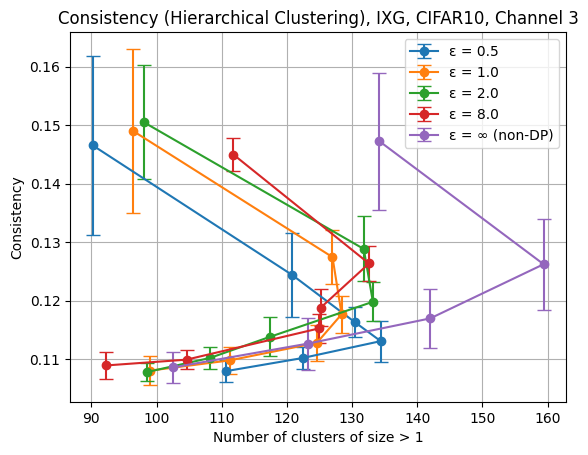

In [6]:
data='CIFAR10'
num_experiments=5
n_rows=10000
channel=3
epochs=30
epsilon=0.0
# clipping_mode='nonDP'
model='vit_small_patch16_224'
explanation_types=['sl', 'ig', 'ixg']
clustering_method='hierarchical'
fid_method='all_clusters'

for explanation_type in explanation_types:
    for channel in [1,2,3]:
        ##### non-DP #####
        clipping_mode='nonDP'
        df_nondp = pd.read_csv(f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epochs={epochs}_channel={channel}.csv')
        df_nondp_grouped = df_nondp.groupby(['max_distance'])
        df_nondp_grouped[['consistency', 'num_clusters', 'num_singles']].agg(['mean', 'std'])

        ##### DP #####
        clipping_mode='BK-MixOpt'
        epsilons = [0.5, 1.0, 2.0, 8.0]

        df_dp = pd.DataFrame()
        for eps in epsilons:
            df_one_eps = pd.read_csv(
                f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epsilon={eps}_epochs={epochs}_channel={channel}.csv')

            df_dp = pd.concat([df_dp, df_one_eps], ignore_index=True)

        df_combined = pd.concat([df_nondp, df_dp], axis=0)

        df_combined_grouped = df_combined.groupby(['max_distance', 'epsilon'])
        df_grouped = df_combined_grouped[['consistency', 'num_clusters', 'num_singles']].agg(['mean', 'std'])
        df_grouped = df_grouped.loc[df_grouped['num_singles']['mean'] <= 9500]
        print(df_grouped)
        if explanation_type == 'ixg':
            print(df_grouped)

        for eps in [0.5, 1.0, 2.0, 8.0, 0.0]:
            filtered = df_grouped.loc[df_grouped.index.get_level_values('epsilon') == eps]
        #     print(filtered)
            mean_values = filtered['consistency']['mean']
            mean_clustercount_values = filtered['num_clusters']['mean']
            std_values = filtered['consistency']['std']
            group_keys = mean_clustercount_values.index.get_level_values(0)
            if eps == 0.0:
                lab = f'ε = ∞ (non-DP)'
            else:
                lab = f'ε = {eps}'
            plt.errorbar(mean_clustercount_values, mean_values, yerr=std_values, fmt='-o', capsize=5, label=lab)
        plt.grid(True)
        plt.legend()
        plt.xlabel('Number of clusters of size > 1')
        plt.ylabel('Consistency')
        plt.title(f'Consistency (Hierarchical Clustering), {explanation_type.upper()}, {data}, Channel {channel}')
        plt.show()

# CIFAR-10 (k-means)

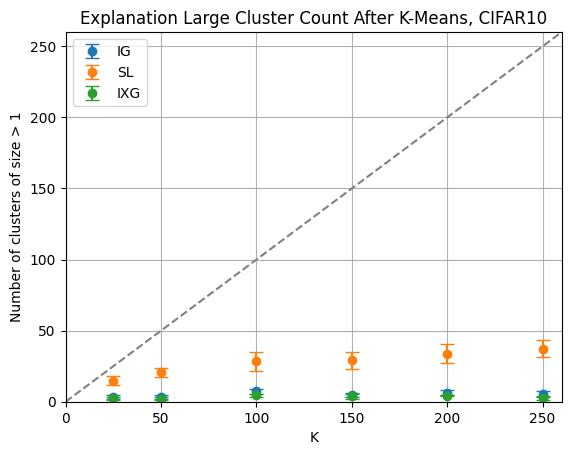

In [24]:
data='CIFAR10'
num_experiments=5
n_rows=10000
channel=1
epochs=30
epsilon=0.0
clipping_mode='nonDP'
model='vit_small_patch16_224'
explanation_types=['ig', 'sl', 'ixg']
clustering_method='kmeans'
fid_method='all_clusters'

for explanation_type in explanation_types:

    df_nondp = pd.read_csv(f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epochs={epochs}_channel={channel}.csv')

    df_nondp_grouped = df_nondp.groupby(['k'])
    df_nondp_grouped[['consistency', 'num_clusters', 'num_singles', 'inertia']].agg(['mean', 'std'])

    mean_values = df_nondp_grouped['num_clusters'].mean()
    std_values = df_nondp_grouped['num_clusters'].std()
    group_keys = mean_values.index

    # Plot the mean values against the group keys ('k') with error bars
    plt.errorbar(group_keys, mean_values, yerr=std_values, fmt='o', capsize=5, label=f'{explanation_type.upper()}')
    plt.xlabel('K')
    plt.ylabel('Number of clusters of size > 1')
    plt.title(f'Explanation Large Cluster Count After K-Means, {data}')
    plt.grid(True)
#     plt.show()
plt.xlim(0, 260)
plt.ylim(0, 260)
plt.plot([0,260], [0,260], linestyle='--', color='gray')
plt.legend()
plt.savefig(f'plots_fid/large_cluster_count_kmeans_{data}')
plt.show()

In [25]:
df_nondp_grouped[['consistency', 'num_clusters', 'num_singles', 'inertia']].agg(['mean', 'std'])

consistency           num_clusters           num_singles            \
             mean       std         mean       std        mean       std   
k                                                                          
25.0     0.100536  0.000649          2.4  0.894427        22.6  0.894427   
50.0     0.100207  0.000222          2.2  0.836660        47.8  0.836660   
100.0    0.100528  0.000406          4.4  1.140175        95.6  1.140175   
150.0    0.101128  0.000879          3.8  1.643168       146.2  1.643168   
200.0    0.101174  0.000742          4.2  0.447214       195.8  0.447214   
250.0    0.100876  0.001142          2.8  1.483240       247.2  1.483240   

           inertia              
              mean         std  
k                               
25.0   8855.635911  715.152528  
50.0   8285.437371  786.170731  
100.0  7323.429056  813.128236  
150.0  6577.501814  874.273639  
200.0  6038.616583  871.946488  
250.0  5576.570915  900.300057

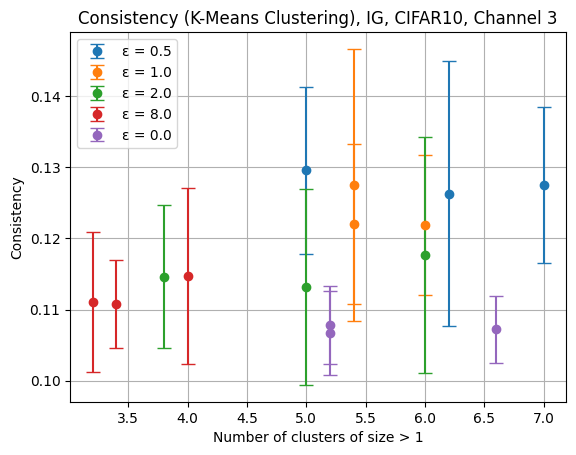

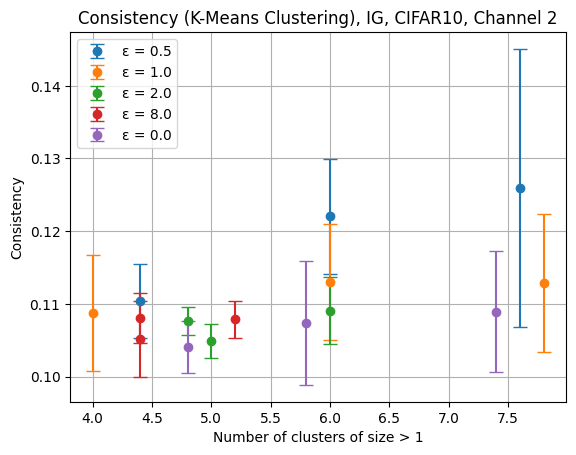

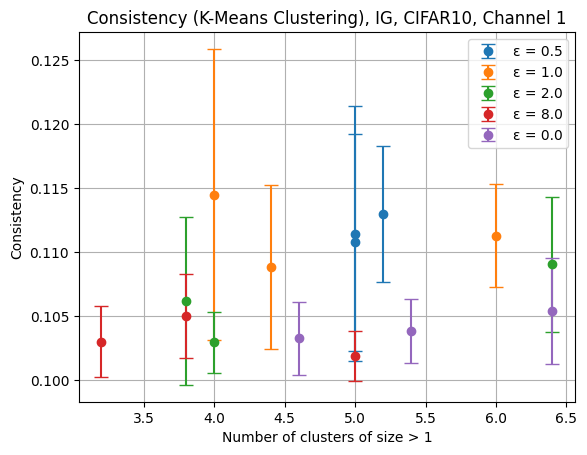

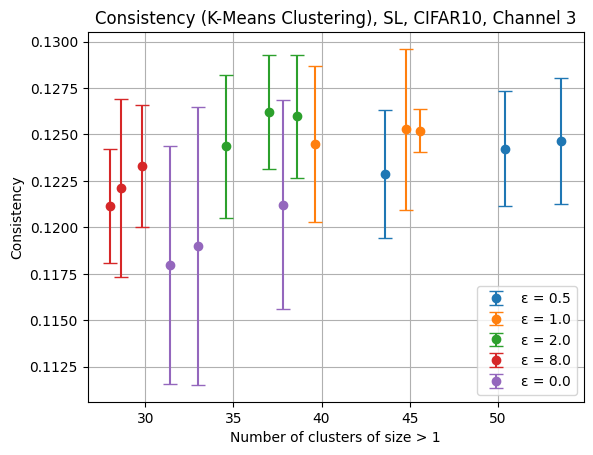

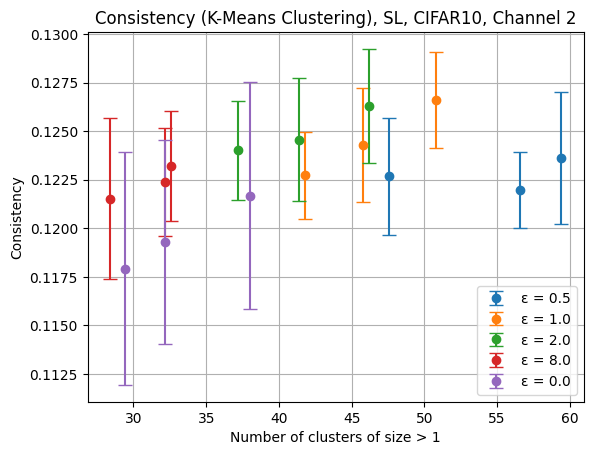

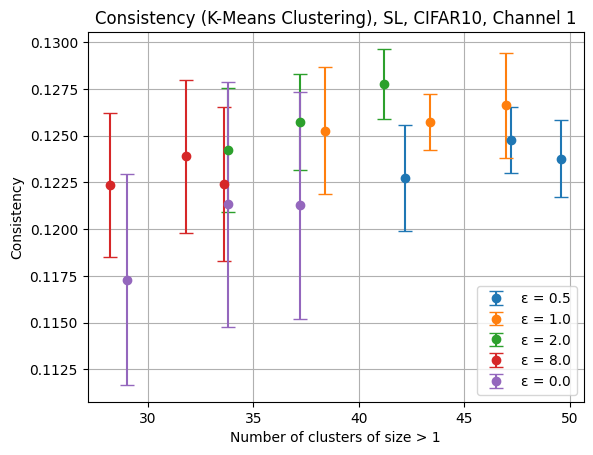

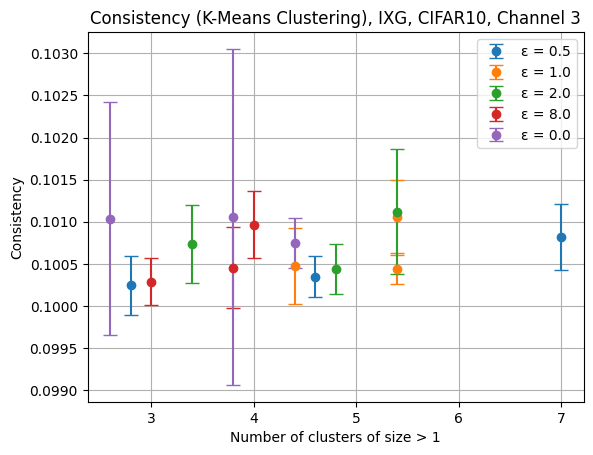

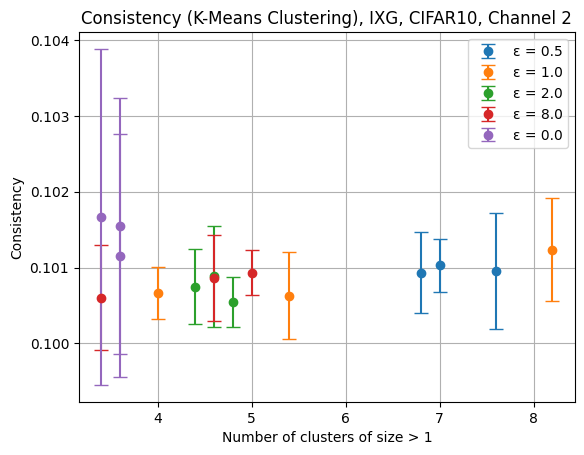

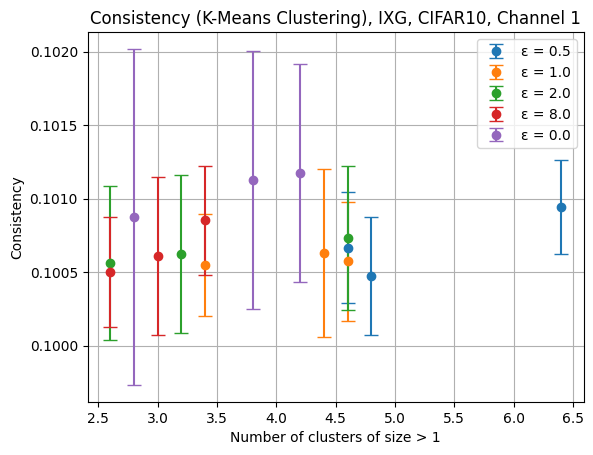

In [31]:
data='CIFAR10'
num_experiments=5
n_rows=10000
channel=1
epochs=30
epsilon=0.0
clipping_mode='nonDP'
model='vit_small_patch16_224'
explanation_type=['sl', 'ig']
clustering_method='kmeans'
fid_method='all_clusters'

kmeans_dict_cif10 = {
    'sl': pd.DataFrame(),
    'ig': pd.DataFrame()
}

for explanation_type in explanation_types:
    for channel in [3,2,1]:
        clipping_mode='nonDP'
        ##### non-DP #####
        df_nondp = pd.read_csv(f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epochs={epochs}_channel={channel}.csv')
        df_nondp_grouped = df_nondp.groupby(['k'])
        df_nondp_grouped[['consistency', 'num_clusters', 'num_singles', 'inertia']].agg(['mean', 'std'])

        ##### DP #####
        clipping_mode='BK-MixOpt'
        epsilons = [0.5, 1.0, 2.0, 8.0]

        df_dp = pd.DataFrame()
        for eps in epsilons:
            df_one_eps = pd.read_csv(
                f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epsilon={eps}_epochs={epochs}_channel={channel}.csv')

            df_dp = pd.concat([df_dp, df_one_eps], ignore_index=True)

        df_combined = pd.concat([df_nondp, df_dp], axis=0)

        df_combined_grouped = df_combined.groupby(['k', 'epsilon'])
        df_grouped = df_combined_grouped[['consistency', 'num_clusters', 'num_singles', 'inertia']].agg(['mean', 'std'])
        df_grouped = df_grouped.loc[df_grouped['num_singles']['mean'] >= 100]

        for eps in [0.5, 1.0, 2.0, 8.0, 0.0]:
            filtered = df_grouped.loc[df_grouped.index.get_level_values('epsilon') == eps]
        #     print(filtered)
            mean_values = filtered['consistency']['mean']
            std_values = filtered['consistency']['std']
#             group_keys = df_grouped.index.get_level_values('k')
            mean_clusters = filtered['num_clusters']['mean']
            std_clusters = filtered['num_clusters']['std']
            group_keys = mean_clusters.index.get_level_values('k')
#             print(group_keys)
            plt.errorbar(mean_clusters, mean_values, yerr=std_values, fmt='o', capsize=5, label=f'ε = {eps}')
        plt.grid(True)
        plt.legend()
        plt.xlabel('Number of clusters of size > 1')
        plt.ylabel('Consistency')
        plt.title(f'Consistency (K-Means Clustering), {explanation_type.upper()}, {data}, Channel {channel}')
        plt.show()
    kmeans_dict_cif10[explanation_type] = df_grouped

In [38]:
kmeans_dict_cif10['sl']

consistency           num_clusters           num_singles  \
                     mean       std         mean       std        mean   
k     epsilon                                                            
150.0 0.0        0.117296  0.005625         29.0  5.700877       121.0   
      0.5        0.122708  0.002831         42.2  5.718391       107.8   
      1.0        0.125269  0.003380         38.4  3.209361       111.6   
      2.0        0.124224  0.003297         33.8  3.563706       116.2   
      8.0        0.122351  0.003839         28.2  3.492850       121.8   
200.0 0.0        0.121317  0.006541         33.8  6.457554       166.2   
      0.5        0.124756  0.001752         47.2  4.868265       152.8   
      1.0        0.125735  0.001508         43.4  3.646917       156.6   
      2.0        0.125706  0.002563         37.2  3.492850       162.8   
      8.0        0.123886  0.004076         31.8  2.387467       168.2   
250.0 0.0        0.121275  0.006069         37.2  5.932959       212.8   
      0.5        0.123767  0.002056         49.6  4.669047       200.4   
      1.0        0.126627  0.002804         47.0  2.345208       203.0   
      2.0        0.127761  0.001871         41.2  3.962323       208.8   
      8.0        0.122431  0.004111         33.6  3.130495       216.4   

                               inertia                
                    std           mean           std  
k     epsilon                                         
150.0 0.0      5.700877   31747.983866   2605.523424  
      0.5      5.718391  462213.783681  47946.629146  
      1.0      3.209361  528100.970058  35796.761471  
      2.0      3.563706  615917.637363  44875.671478  
      8.0      3.492850  739104.060257  43432.951035  
200.0 0.0      6.457554   28990.670511   2660.708574  
      0.5      4.868265  439780.702259  44681.311175  
      1.0      3.646917  498323.375077  32781.315067  
      2.0      3.492850  575379.371981  41035.917063  
      8.0      2.387467  680672.590557  41699.791880  
250.0 0.0      5.932959   26641.951329   2857.116372  
      0.5      4.669047  419710.120451  41932.619953  
      1.0      2.345208  472004.103978  30390.068709  
      2.0      3.962323  540750.835851  38283.987445  
      8.0      3.130495  630209.064959  38779.960529

In [39]:
kmeans_dict_cif10['ig']

consistency           num_clusters           num_singles  \
                     mean       std         mean       std        mean   
k     epsilon                                                            
150.0 0.0        0.103256  0.002861          4.6  1.516575       145.4   
      0.5        0.110754  0.008516          5.0  1.581139       145.0   
      1.0        0.114505  0.011401          4.0  1.581139       146.0   
      2.0        0.106189  0.006589          3.8  0.836660       146.2   
      8.0        0.104996  0.003282          3.8  1.095445       146.2   
200.0 0.0        0.105384  0.004124          6.4  1.949359       193.6   
      0.5        0.112977  0.005328          5.2  2.280351       194.8   
      1.0        0.108802  0.006414          4.4  1.516575       195.6   
      2.0        0.102932  0.002367          4.0  1.732051       196.0   
      8.0        0.102976  0.002791          3.2  0.447214       196.8   
250.0 0.0        0.103821  0.002544          5.4  2.073644       244.6   
      0.5        0.111429  0.009985          5.0  2.345208       245.0   
      1.0        0.111284  0.004040          6.0  2.000000       244.0   
      2.0        0.109031  0.005289          6.4  1.516575       243.6   
      8.0        0.101879  0.001981          5.0  1.414214       245.0   

                               inertia                
                    std           mean           std  
k     epsilon                                         
150.0 0.0      1.516575   24254.267410   4559.974689  
      0.5      1.581139  285839.437402  15609.939863  
      1.0      1.581139  355683.514545   7366.479723  
      2.0      0.836660  430304.397703  32150.172681  
      8.0      1.095445  537166.866711  13561.141235  
200.0 0.0      1.949359   23366.290848   4330.283365  
      0.5      2.280351  278320.450421  15263.429215  
      1.0      1.516575  344137.885575   6607.445863  
      2.0      1.732051  415200.650773  30845.853791  
      8.0      0.447214  514664.364696  13016.120282  
250.0 0.0      2.073644   22574.978467   4126.040384  
      0.5      2.345208  270953.828821  15173.862679  
      1.0      2.000000  334508.493454   6688.848099  
      2.0      1.516575  401288.141783  29524.614537  
      8.0      1.414214  494597.378738  12822.345088

# SVHN (Hierarchical)

                     consistency           num_clusters           num_singles  \
                            mean       std         mean       std        mean   
max_distance epsilon                                                            
0.4          0.0         0.59392  0.139656         88.6  57.52217      9321.6   

                                  
                             std  
max_distance epsilon              
0.4          0.0      604.332111  


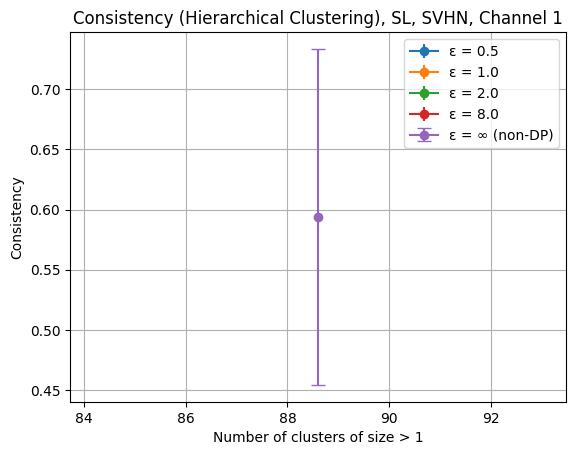

Empty DataFrame
Columns: [(consistency, mean), (consistency, std), (num_clusters, mean), (num_clusters, std), (num_singles, mean), (num_singles, std)]
Index: []


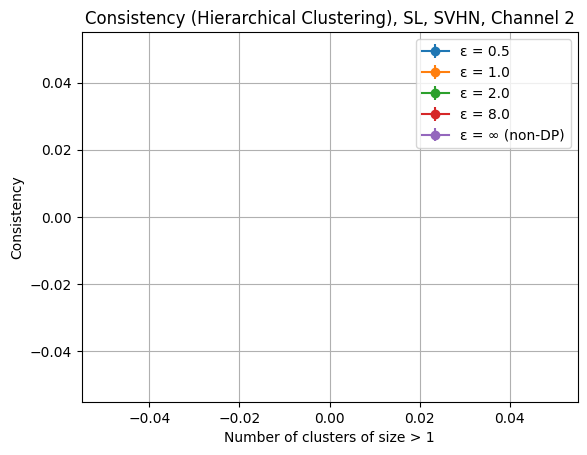

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.35         0.0        0.566902  0.121180         98.6  64.314073   
0.40         0.0        0.486818  0.127294        124.6  68.907910   
4.00         0.5        0.256990  0.124292         77.0  21.400935   
             1.0        0.266289  0.035615         84.0  13.928388   
             2.0        0.265531  0.028025         93.8  22.862633   
             8.0        0.251326  0.042460        104.4  16.592167   

                     num_singles              
                            mean         std  
max_distance epsilon                          
0.35         0.0          9227.4  719.495865  
0.40         0.0          8913.6  877.467549  
4.00         0.5          9407.6  188.812870  
             1.0          9400.6  185.184503  
             2.0          9299.6  225.32

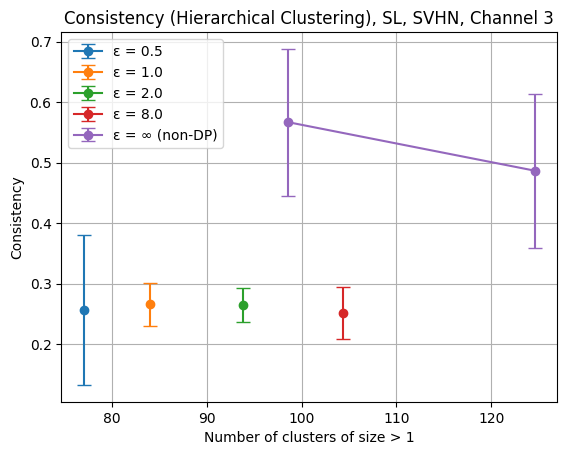

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.20         0.0        0.348383  0.073149        119.6  70.578325   
0.25         0.0        0.301739  0.069570        155.2  47.923898   
0.30         0.0        0.261388  0.053713        170.0  50.189640   
0.35         0.0        0.227064  0.047243        177.2  37.559286   
0.40         0.0        0.209542  0.040373        188.0  32.526912   
2.00         0.5        0.284607  0.144002         47.2   4.868265   
             1.0        0.261388  0.045455         52.2  10.497619   
             2.0        0.265524  0.026448         61.2  11.122050   
             8.0        0.239137  0.025280         70.0   8.746428   
2.50         0.5        0.208347  0.065706         89.4   9.685040   
             1.0        0.216228  0.037665         84.0   5.958188   
             2.0    

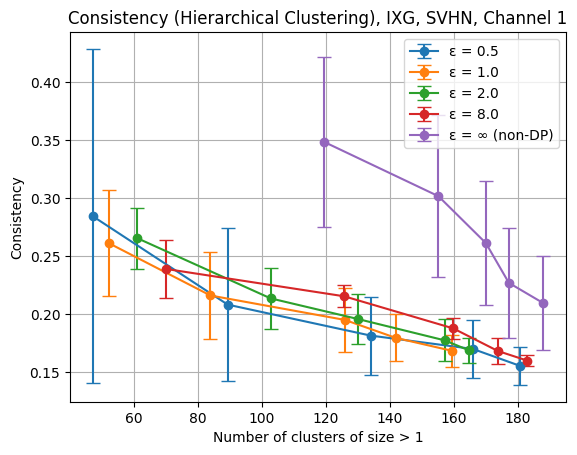

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.20         0.0        0.446135  0.113628         75.4  53.798699   
0.25         0.0        0.369918  0.076272        111.0  67.601775   
0.30         0.0        0.326566  0.070694        142.4  51.154667   
0.35         0.0        0.288714  0.058078        171.0  54.598535   
0.40         0.0        0.252685  0.051290        180.0  50.611264   
2.50         0.5        0.269111  0.113455         48.2   8.613942   
             1.0        0.256915  0.037819         50.0   9.433981   
             2.0        0.263404  0.048382         60.2  11.031772   
             8.0        0.243637  0.031983         74.0   5.700877   
3.00         0.5        0.220181  0.074428         87.6   6.348228   
             1.0        0.219149  0.036563         88.8   9.654015   
             2.0    

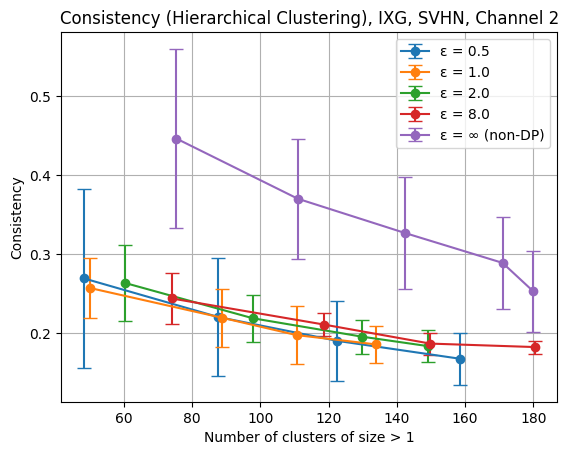

                     consistency           num_clusters             \
                            mean       std         mean        std   
max_distance epsilon                                                 
0.20         0.0        0.251862  0.048142        139.2  45.482964   
0.25         0.0        0.218816  0.040354        155.6  42.582860   
0.30         0.0        0.199500  0.025721        176.2  33.394610   
0.35         0.0        0.183705  0.023140        174.0  26.758176   
0.40         0.0        0.173792  0.020719        176.8  25.878563   
1.50         0.5        0.227474  0.114771         43.6   7.569676   
             1.0        0.221005  0.047581         53.0  13.527749   
             2.0        0.214874  0.026490         56.0  11.335784   
             8.0        0.210117  0.023329         66.0   2.345208   
2.00         0.5        0.188806  0.050128        105.4  16.318701   
             1.0        0.187338  0.031510         91.0  11.045361   
             2.0    

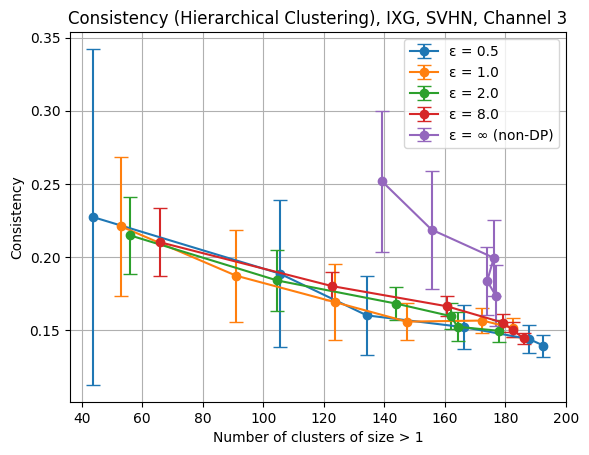

FileNotFoundError: [Errno 2] No such file or directory: 'fidelity/fid_SVHN_hierarchical_method=all_clusters/mode=nonDP_nrows=10000_type=ig_epochs=50_channel=1.csv'

In [5]:
data='SVHN'
num_experiments=5
n_rows=10000
channel=3
epochs=50
epsilon=0.0
# clipping_mode='nonDP'
model='vit_small_patch16_224'
explanation_types=['sl', 'ixg', 'ig']
clustering_method='hierarchical'
fid_method='all_clusters'

for explanation_type in explanation_types:
    for channel in [1,2,3]:
        ##### non-DP #####
        clipping_mode='nonDP'
        df_nondp = pd.read_csv(f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epochs={epochs}_channel={channel}.csv')
        df_nondp_grouped = df_nondp.groupby(['max_distance'])
        df_nondp_grouped[['consistency', 'num_clusters', 'num_singles']].agg(['mean', 'std'])

        ##### DP #####
        clipping_mode='BK-MixOpt'
        epsilons = [0.5, 1.0, 2.0, 8.0]

        df_dp = pd.DataFrame()
        for eps in epsilons:
            df_one_eps = pd.read_csv(
                f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epsilon={eps}_epochs={epochs}_channel={channel}.csv')

            df_dp = pd.concat([df_dp, df_one_eps], ignore_index=True)

        df_combined = pd.concat([df_nondp, df_dp], axis=0)

        df_combined_grouped = df_combined.groupby(['max_distance', 'epsilon'])
        df_grouped = df_combined_grouped[['consistency', 'num_clusters', 'num_singles']].agg(['mean', 'std'])
        df_grouped = df_grouped.loc[df_grouped['num_singles']['mean'] <= 9500]
        print(df_grouped)
        for eps in [0.5, 1.0, 2.0, 8.0, 0.0]:
            filtered = df_grouped.loc[df_grouped.index.get_level_values('epsilon') == eps]
        #     print(filtered)
            mean_values = filtered['consistency']['mean']
            mean_clustercount_values = filtered['num_clusters']['mean']
            std_values = filtered['consistency']['std']
            group_keys = mean_clustercount_values.index.get_level_values(0)
            if eps == 0.0:
                lab = f'ε = ∞ (non-DP)'
            else:
                lab = f'ε = {eps}'
            plt.errorbar(mean_clustercount_values, mean_values, yerr=std_values, fmt='-o', capsize=5, label=lab)
        plt.grid(True)
        plt.legend()
        plt.xlabel('Number of clusters of size > 1')
        plt.ylabel('Consistency')
        plt.title(f'Consistency (Hierarchical Clustering), {explanation_type.upper()}, {data}, Channel {channel}')
        plt.show()

# SVHN (k-means)

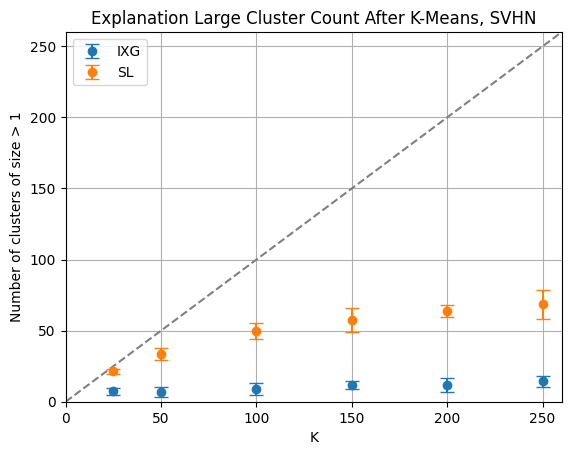

In [40]:
data='SVHN'
num_experiments=5
n_rows=10000
channel=1
epochs=50
epsilon=0.0
clipping_mode='nonDP'
model='vit_small_patch16_224' # 'beit_base_patch16_224.in22k_ft_in22k_in1k'
explanation_types=['ixg', 'sl']
clustering_method='kmeans'
fid_method='all_clusters'

for explanation_type in explanation_types:

    df_nondp = pd.read_csv(f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epochs={epochs}_channel={channel}.csv')

    df_nondp_grouped = df_nondp.groupby(['k'])
    df_nondp_grouped[['consistency', 'num_clusters', 'num_singles']].agg(['mean', 'std'])

    mean_values = df_nondp_grouped['num_clusters'].mean()
    std_values = df_nondp_grouped['num_clusters'].std()
    group_keys = mean_values.index

    # Plot the mean values against the group keys ('k') with error bars
    plt.errorbar(group_keys, mean_values, yerr=std_values, fmt='o', capsize=5, label=f'{explanation_type.upper()}')
    plt.xlabel('K')
    plt.ylabel('Number of clusters of size > 1')
    plt.title(f'Explanation Large Cluster Count After K-Means, {data}')
    plt.grid(True)
#     plt.show()
plt.xlim(0, 260)
plt.ylim(0, 260)
plt.plot([0,260], [0,260], linestyle='--', color='gray')
plt.legend()
plt.savefig(f'plots_fid/large_cluster_count_kmeans_{data}')
plt.show()

              consistency           num_clusters           num_singles  \
                     mean       std         mean       std        mean   
k     epsilon                                                            
150.0 0.0        0.116837  0.000686          7.8  1.643168       142.2   
      0.5        0.142641  0.009167          8.8  3.271085       141.2   
      1.0        0.124983  0.008355          6.8  2.774887       143.2   
      2.0        0.121355  0.002962          5.8  2.167948       144.2   
      8.0        0.118300  0.001305          4.4  3.361547       145.6   
200.0 0.0        0.117374  0.000857          8.6  2.966479       191.4   
      0.5        0.149148  0.020898          9.0  3.807887       191.0   
      1.0        0.127868  0.007056          9.6  3.974921       190.4   
      2.0        0.121488  0.003266          7.2  2.167948       192.8   
      8.0        0.118906  0.001053          4.8  1.483240       195.2   
250.0 0.0        0.117806  0.001371   

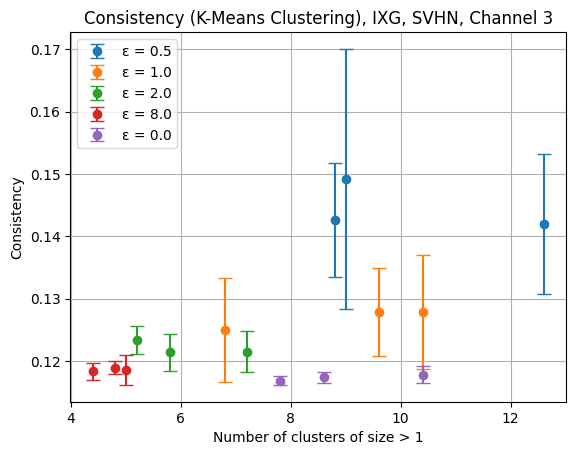

              consistency           num_clusters           num_singles  \
                     mean       std         mean       std        mean   
k     epsilon                                                            
150.0 0.0        0.119208  0.001516         15.2  4.207137       134.8   
      0.5        0.147751  0.009740         12.4  6.767570       137.6   
      1.0        0.124638  0.004062          9.0  5.147815       141.0   
      2.0        0.122415  0.003852          8.6  3.209361       141.4   
      8.0        0.120081  0.002760          9.6  5.899152       140.4   
200.0 0.0        0.119079  0.001740         15.0  4.847680       185.0   
      0.5        0.150306  0.023465         14.8  6.379655       185.2   
      1.0        0.126864  0.006016         12.2  7.120393       187.8   
      2.0        0.123765  0.004443         10.2  3.420526       189.8   
      8.0        0.120493  0.002698          8.4  5.594640       191.6   
250.0 0.0        0.120054  0.001599   

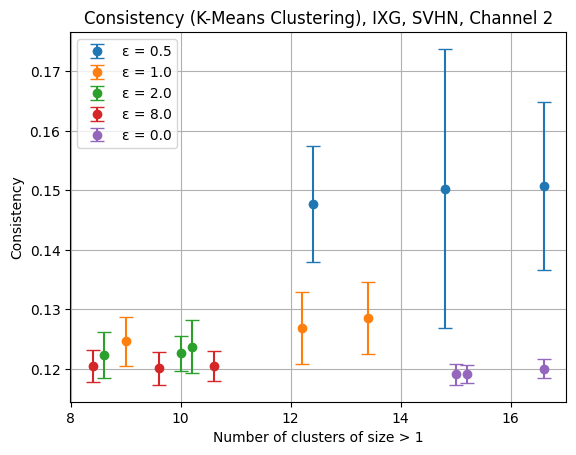

              consistency           num_clusters           num_singles  \
                     mean       std         mean       std        mean   
k     epsilon                                                            
150.0 0.0        0.118580  0.001516         11.8  3.114482       138.2   
      0.5        0.152260  0.016333          8.6  2.302173       141.4   
      1.0        0.128840  0.007583          8.0  3.807887       142.0   
      2.0        0.127027  0.008906          6.0  1.000000       144.0   
      8.0        0.121542  0.005141          4.8  2.863564       145.2   
200.0 0.0        0.118378  0.000924         11.8  4.764452       188.2   
      0.5        0.156469  0.012060         11.6  3.974921       188.4   
      1.0        0.131646  0.009871          8.4  3.577709       191.6   
      2.0        0.127780  0.008029          4.8  3.193744       195.2   
      8.0        0.122882  0.004992          5.2  1.788854       194.8   
250.0 0.0        0.119848  0.001259   

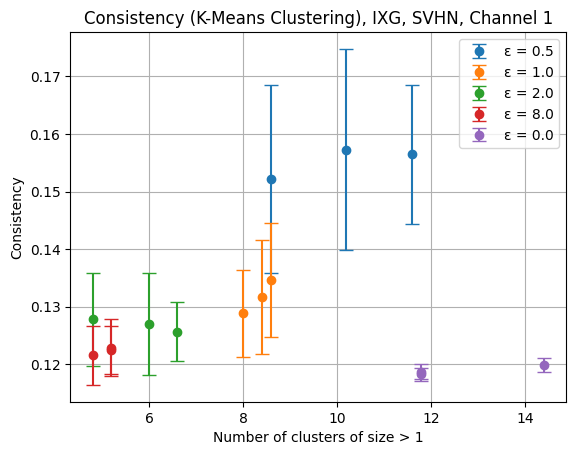

              consistency           num_clusters            num_singles  \
                     mean       std         mean        std        mean   
k     epsilon                                                             
150.0 8.0        0.132341  0.005507         42.8   6.833740       107.2   
200.0 0.0        0.149453  0.009582         63.2  12.676750       136.8   
      0.5        0.167351  0.012611         67.6  15.453155       132.4   
      1.0        0.143396  0.011028         65.8  13.103435       134.2   
      2.0        0.140744  0.009187         56.0   9.695360       144.0   
      8.0        0.134456  0.006566         48.4   6.693280       151.6   
250.0 0.0        0.150655  0.007757         69.2   6.457554       180.8   
      0.5        0.168621  0.014458         80.4  16.024980       169.6   
      1.0        0.143950  0.009928         76.2   9.311283       173.8   
      2.0        0.143072  0.007606         68.2   8.167007       181.8   
      8.0        0.136692

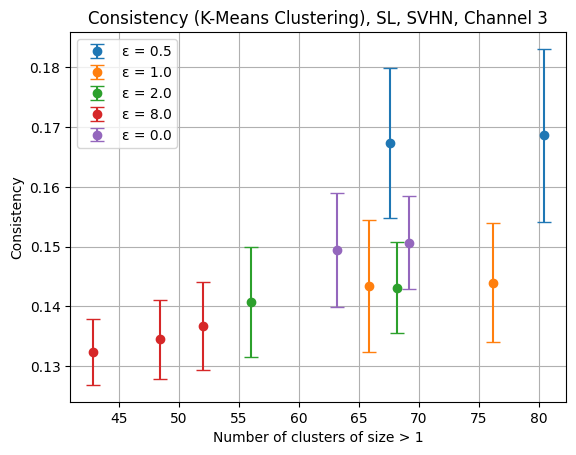

              consistency           num_clusters            num_singles  \
                     mean       std         mean        std        mean   
k     epsilon                                                             
150.0 8.0        0.132815  0.006722         43.8   5.167204       106.2   
200.0 0.0        0.145965  0.004766         69.4   5.594640       130.6   
      0.5        0.167023  0.013360         70.0  14.662878       130.0   
      1.0        0.144955  0.013616         70.4  11.013628       129.6   
      2.0        0.140759  0.009722         64.6  11.738824       135.4   
      8.0        0.135041  0.005669         51.8  10.709809       148.2   
250.0 0.0        0.148765  0.005954         73.6  10.968136       176.4   
      0.5        0.166172  0.015092         77.6  20.574256       172.4   
      1.0        0.146740  0.010862         75.8  15.155857       174.2   
      2.0        0.141769  0.006254         70.0  13.435029       180.0   
      8.0        0.134995

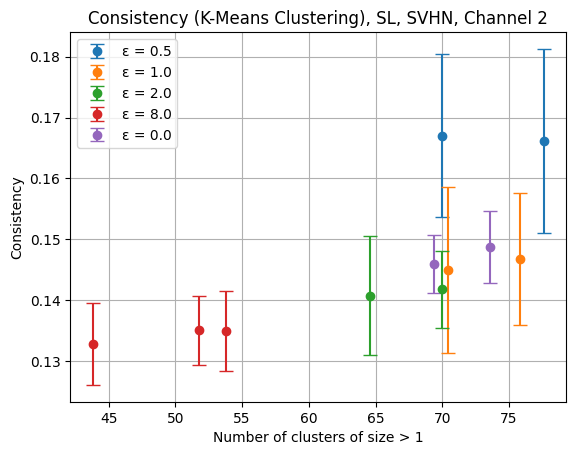

              consistency           num_clusters            num_singles  \
                     mean       std         mean        std        mean   
k     epsilon                                                             
150.0 8.0        0.133271  0.004706         40.4   6.308724       109.6   
200.0 0.0        0.147131  0.007391         63.8   4.438468       136.2   
      0.5        0.168769  0.015785         67.0  11.113055       133.0   
      1.0        0.145318  0.011865         66.8   8.167007       133.2   
      2.0        0.141049  0.008032         57.2   6.534524       142.8   
      8.0        0.134711  0.006783         43.8   7.823043       156.2   
250.0 0.0        0.151581  0.008886         68.4   9.939819       181.6   
      0.5        0.168307  0.014142         71.8  13.881643       178.2   
      1.0        0.148183  0.012271         73.6   7.162402       176.4   
      2.0        0.142385  0.010305         58.2   7.758866       191.8   
      8.0        0.136268

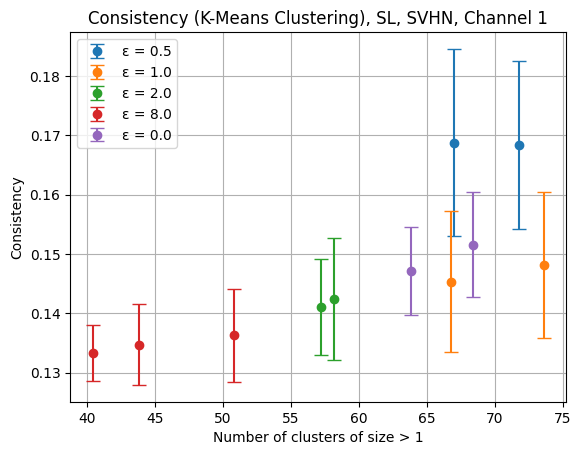

In [42]:
data='SVHN'
num_experiments=5
n_rows=10000
channel=1
epochs=50
epsilon=0.0
clipping_mode='nonDP'
model='vit_small_patch16_224'
# explanation_type='ixg'
clustering_method='kmeans'
fid_method='all_clusters'

kmeans_dict_svhn = {
    'sl': pd.DataFrame(),
    'ixg': pd.DataFrame()
}

##### non-DP #####
for explanation_type in explanation_types:
    for channel in [3,2,1]:
        clipping_mode='nonDP'
        df_nondp = pd.read_csv(f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epochs={epochs}_channel={channel}.csv')
        df_nondp_grouped = df_nondp.groupby(['k'])
        df_nondp_grouped[['consistency', 'num_clusters', 'num_singles', 'inertia']].agg(['mean', 'std'])

        ##### DP #####
        clipping_mode='BK-MixOpt'
        epsilons = [0.5, 1.0, 2.0, 8.0]

        df_dp = pd.DataFrame()
        for eps in epsilons:
            df_one_eps = pd.read_csv(
                f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epsilon={eps}_epochs={epochs}_channel={channel}.csv')

            df_dp = pd.concat([df_dp, df_one_eps], ignore_index=True)

        df_combined = pd.concat([df_nondp, df_dp], axis=0)

        df_combined_grouped = df_combined.groupby(['k', 'epsilon'])
        df_grouped = df_combined_grouped[['consistency', 'num_clusters', 'num_singles', 'inertia']].agg(['mean', 'std'])
        df_grouped = df_grouped.loc[df_grouped['num_singles']['mean'] >= 100]
        print(df_grouped)
        for eps in [0.5, 1.0, 2.0, 8.0, 0.0]:
            filtered = df_grouped.loc[df_grouped.index.get_level_values('epsilon') == eps]
        #     print(filtered)
            mean_values = filtered['consistency']['mean']
            std_values = filtered['consistency']['std']
            mean_clusters = filtered['num_clusters']['mean']
            std_clusters = filtered['num_clusters']['mean']
            group_keys = mean_clusters.index
            plt.errorbar(mean_clusters, mean_values, yerr=std_values, fmt='o', capsize=5, label=f'ε = {eps}')
        plt.grid(True)
        plt.xlabel('Number of clusters of size > 1')
        plt.ylabel('Consistency')
        plt.title(f'Consistency (K-Means Clustering), {explanation_type.upper()}, {data}, Channel {channel}')
        plt.legend()
        plt.show()
    kmeans_dict_svhn[explanation_type] = df_grouped

In [43]:
kmeans_dict_svhn['sl']

consistency           num_clusters            num_singles  \
                     mean       std         mean        std        mean   
k     epsilon                                                             
150.0 8.0        0.133271  0.004706         40.4   6.308724       109.6   
200.0 0.0        0.147131  0.007391         63.8   4.438468       136.2   
      0.5        0.168769  0.015785         67.0  11.113055       133.0   
      1.0        0.145318  0.011865         66.8   8.167007       133.2   
      2.0        0.141049  0.008032         57.2   6.534524       142.8   
      8.0        0.134711  0.006783         43.8   7.823043       156.2   
250.0 0.0        0.151581  0.008886         68.4   9.939819       181.6   
      0.5        0.168307  0.014142         71.8  13.881643       178.2   
      1.0        0.148183  0.012271         73.6   7.162402       176.4   
      2.0        0.142385  0.010305         58.2   7.758866       191.8   
      8.0        0.136268  0.007799         50.8   6.140033       199.2   

                               inertia                 
                     std          mean            std  
k     epsilon                                          
150.0 8.0       6.308724  4.855510e+06  743502.244439  
200.0 0.0       4.438468  4.812048e+04   13182.436069  
      0.5      11.113055  1.679565e+06  359416.561753  
      1.0       8.167007  2.888410e+06  379459.905175  
      2.0       6.534524  3.435444e+06  406348.457864  
      8.0       7.823043  4.539751e+06  693415.575786  
250.0 0.0       9.939819  4.564123e+04   12948.987607  
      0.5      13.881643  1.604973e+06  331615.636067  
      1.0       7.162402  2.759638e+06  361644.721874  
      2.0       7.758866  3.268421e+06  387218.766237  
      8.0       6.140033  4.271569e+06  638615.780867

In [44]:
kmeans_dict_svhn['ixg']

consistency           num_clusters           num_singles  \
                     mean       std         mean       std        mean   
k     epsilon                                                            
150.0 0.0        0.118580  0.001516         11.8  3.114482       138.2   
      0.5        0.152260  0.016333          8.6  2.302173       141.4   
      1.0        0.128840  0.007583          8.0  3.807887       142.0   
      2.0        0.127027  0.008906          6.0  1.000000       144.0   
      8.0        0.121542  0.005141          4.8  2.863564       145.2   
200.0 0.0        0.118378  0.000924         11.8  4.764452       188.2   
      0.5        0.156469  0.012060         11.6  3.974921       188.4   
      1.0        0.131646  0.009871          8.4  3.577709       191.6   
      2.0        0.127780  0.008029          4.8  3.193744       195.2   
      8.0        0.122882  0.004992          5.2  1.788854       194.8   
250.0 0.0        0.119848  0.001259         14.4  3.911521       235.6   
      0.5        0.157290  0.017495         10.2  2.774887       239.8   
      1.0        0.134659  0.009865          8.6  2.880972       241.4   
      2.0        0.125667  0.005188          6.6  2.302173       243.4   
      8.0        0.122468  0.004092          5.2  1.923538       244.8   

                               inertia                 
                    std           mean            std  
k     epsilon                                          
150.0 0.0      3.114482    8304.629679    2327.567080  
      0.5      2.302173  327607.773235   47597.246100  
      1.0      3.807887  584602.442578   61884.833600  
      2.0      1.000000  728231.803091   65792.499608  
      8.0      2.863564  974802.371841  142217.590525  
200.0 0.0      4.764452    7718.776603    2255.884688  
      0.5      3.974921  312448.792129   42938.164272  
      1.0      3.577709  555151.362786   57493.091233  
      2.0      3.193744  685119.905198   63452.546627  
      8.0      1.788854  901968.195997  129273.518430  
250.0 0.0      3.911521    7218.776563    2169.827996  
      0.5      2.774887  298824.274803   39027.645532  
      1.0      2.880972  527907.391804   54093.777392  
      2.0      2.302173  649490.502939   60982.741619  
      8.0      1.923538  841556.435064  116971.606037

# CIFAR100 (Hierarchical)

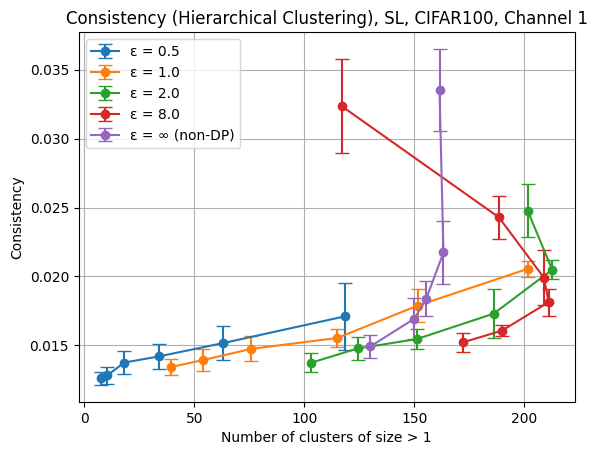

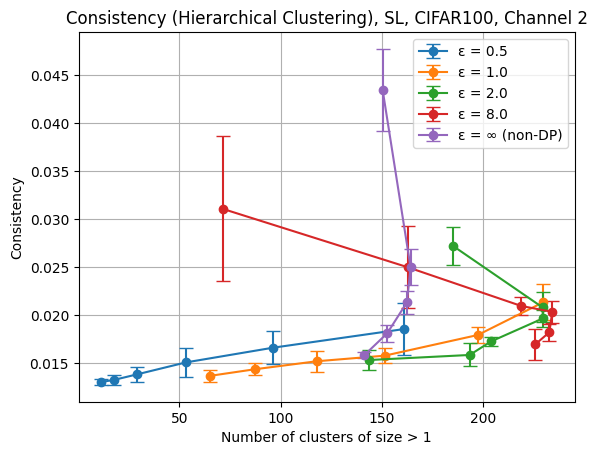

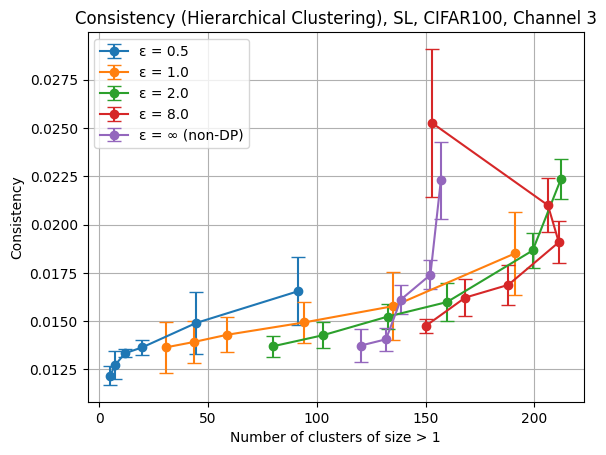

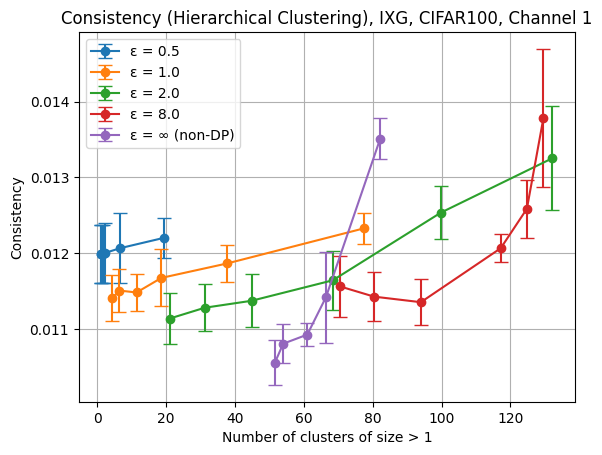

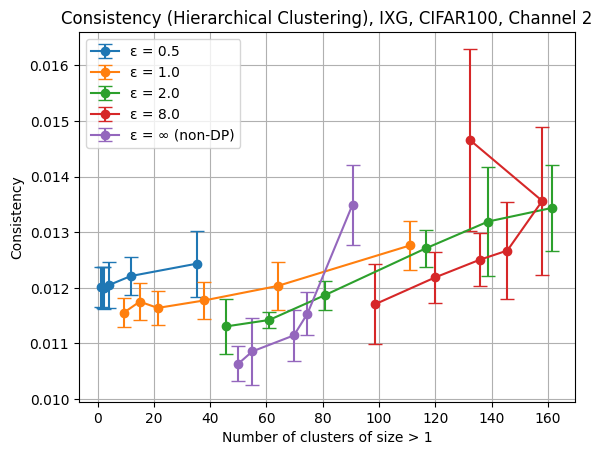

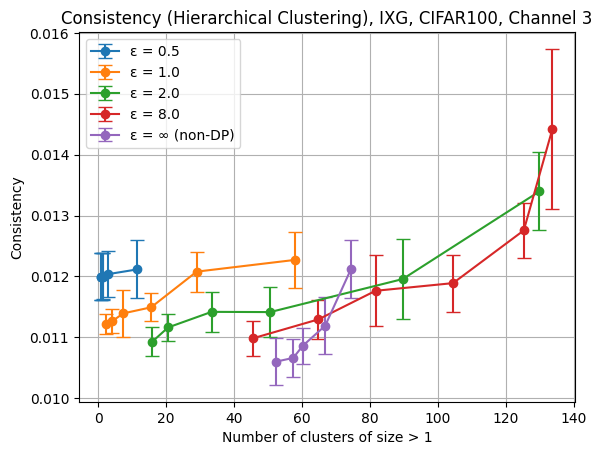

In [12]:
data='CIFAR100'
num_experiments=5
n_rows=10000
channel=3
epochs=9
epsilon=0.0
# clipping_mode='nonDP'
model='beit_base_patch16_224.in22k_ft_in22k_in1k'
explanation_types=['sl', 'ixg']
clustering_method='hierarchical'
fid_method='all_clusters'

for explanation_type in explanation_types:
    for channel in [1,2,3]:
        ##### non-DP #####
        clipping_mode='nonDP'
        df_nondp = pd.read_csv(f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epochs={epochs}_channel={channel}.csv')
        df_nondp_grouped = df_nondp.groupby(['max_distance'])
        df_nondp_grouped[['consistency', 'num_clusters']].agg(['mean', 'std'])

        ##### DP #####
        clipping_mode='BK-MixOpt'
        epsilons = [0.5, 1.0, 2.0, 8.0]

        df_dp = pd.DataFrame()
        for eps in epsilons:
            df_one_eps = pd.read_csv(
                f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epsilon={eps}_epochs={epochs}_channel={channel}.csv')

            df_dp = pd.concat([df_dp, df_one_eps], ignore_index=True)

        df_combined = pd.concat([df_nondp, df_dp], axis=0)

        df_combined_grouped = df_combined.groupby(['max_distance', 'epsilon'])
        df_grouped = df_combined_grouped[['consistency', 'num_clusters']].agg(['mean', 'std'])

        for eps in [0.5, 1.0, 2.0, 8.0, 0.0]:
            filtered = df_grouped.loc[df_grouped.index.get_level_values('epsilon') == eps]
        #     print(filtered)
            mean_values = filtered['consistency']['mean']
            mean_clustercount_values = filtered['num_clusters']['mean']
            std_values = filtered['consistency']['std']
            group_keys = mean_clustercount_values.index.get_level_values(0)
            if eps == 0.0:
                lab = f'ε = ∞ (non-DP)'
            else:
                lab = f'ε = {eps}'
            plt.errorbar(mean_clustercount_values, mean_values, yerr=std_values, fmt='-o', capsize=5, label=lab)
        plt.grid(True)
        plt.legend()
        plt.xlabel('Number of clusters of size > 1')
        plt.ylabel('Consistency')
        plt.title(f'Consistency (Hierarchical Clustering), {explanation_type.upper()}, {data}, Channel {channel}')
        plt.show()

# CIFAR100 (k-means)

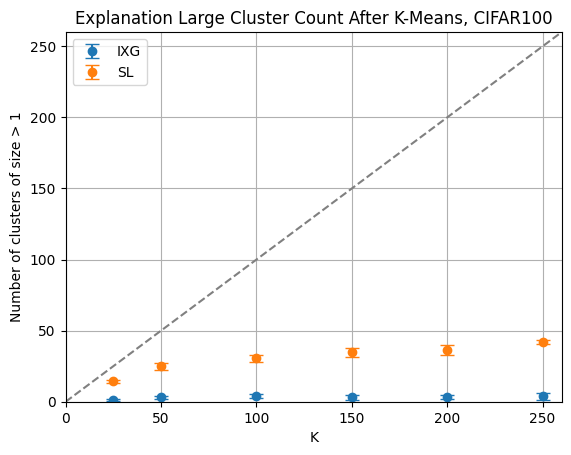

In [16]:
data='CIFAR100'
num_experiments=5
n_rows=10000
channel=1
epochs=9
epsilon=0.0
clipping_mode='nonDP'
model='beit_base_patch16_224.in22k_ft_in22k_in1k'
explanation_types=['ixg', 'sl']
clustering_method='kmeans'
fid_method='all_clusters'

for explanation_type in explanation_types:

    df_nondp = pd.read_csv(f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epochs={epochs}_channel={channel}.csv')

    df_nondp_grouped = df_nondp.groupby(['k'])
    df_nondp_grouped[['consistency', 'num_clusters']].agg(['mean', 'std'])

    mean_values = df_nondp_grouped['num_clusters'].mean()
    std_values = df_nondp_grouped['num_clusters'].std()
    group_keys = mean_values.index

    # Plot the mean values against the group keys ('k') with error bars
    plt.errorbar(group_keys, mean_values, yerr=std_values, fmt='o', capsize=5, label=f'{explanation_type.upper()}')
    plt.xlabel('K')
    plt.ylabel('Number of clusters of size > 1')
    plt.title(f'Explanation Large Cluster Count After K-Means, {data}')
    plt.grid(True)
#     plt.show()
plt.xlim(0, 260)
plt.ylim(0, 260)
plt.plot([0,260], [0,260], linestyle='--', color='gray')
plt.legend()
plt.savefig(f'plots_fid/large_cluster_count_kmeans_{data}')
plt.show()

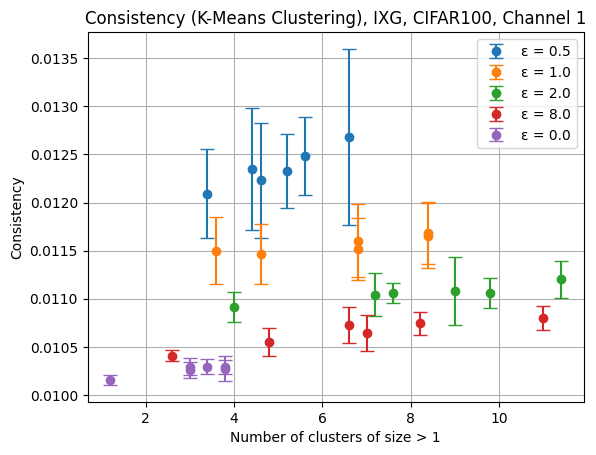

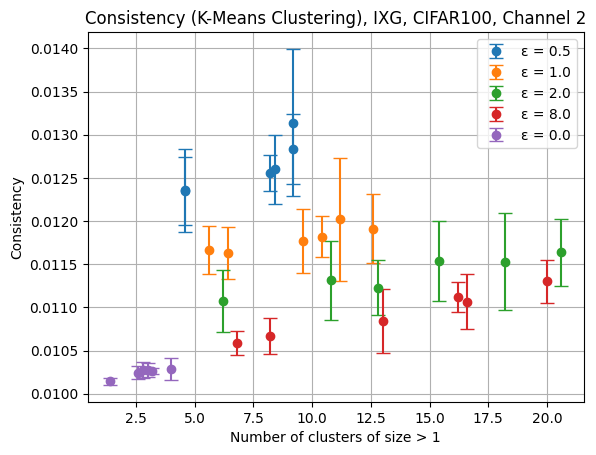

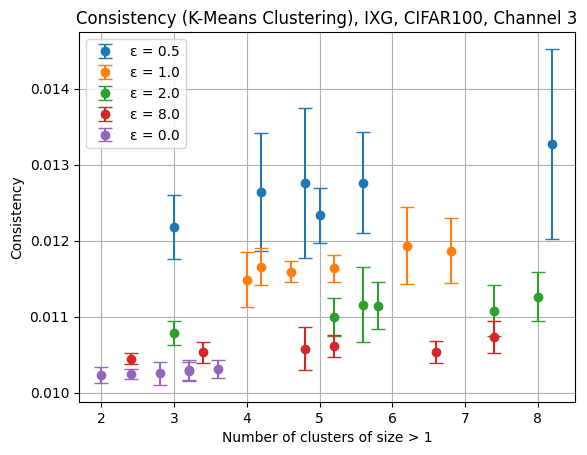

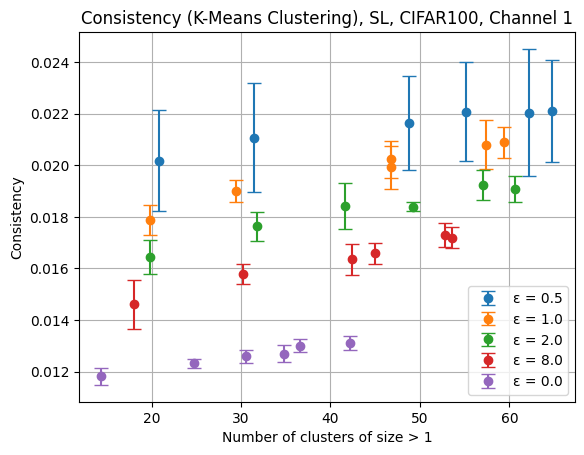

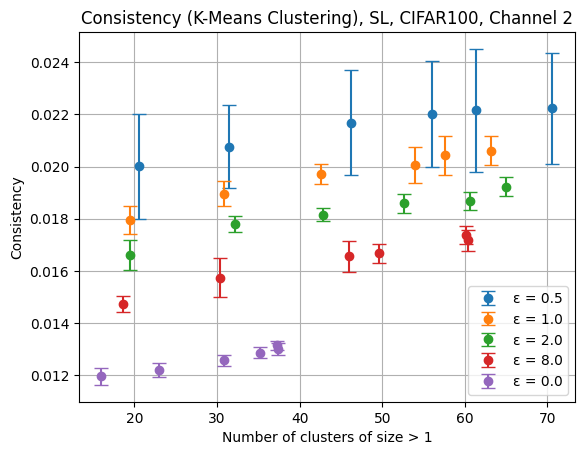

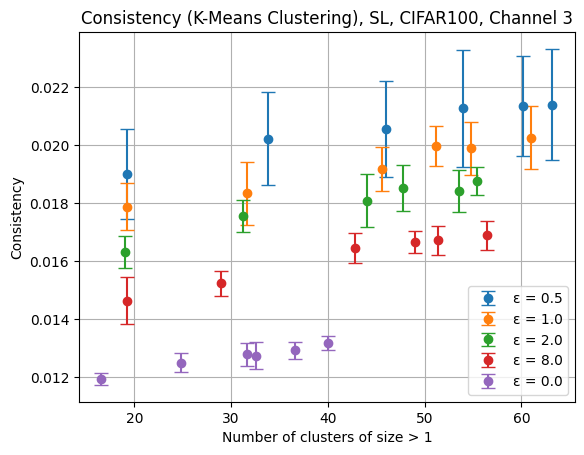

In [23]:
data='CIFAR100'
num_experiments=5
n_rows=10000
channel=1
epochs=9
epsilon=0.0
clipping_mode='nonDP'
model='beit_base_patch16_224.in22k_ft_in22k_in1k'
explanation_types=['ixg', 'sl']
clustering_method='kmeans'
fid_method='all_clusters'

##### non-DP #####
for explanation_type in explanation_types:
    for channel in [1,2,3]:
        clipping_mode='nonDP'
        
        df_nondp = pd.read_csv(f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epochs={epochs}_channel={channel}.csv')
        df_nondp_grouped = df_nondp.groupby(['k'])
        df_nondp_grouped[['consistency', 'num_clusters']].agg(['mean', 'std'])

        ##### DP #####
        clipping_mode='BK-MixOpt'
        epsilons = [0.5, 1.0, 2.0, 8.0]

        df_dp = pd.DataFrame()
        for eps in epsilons:
            df_one_eps = pd.read_csv(
                f'fidelity/fid_{data}_{clustering_method}_method={fid_method}/mode={clipping_mode}_nrows={n_rows}_type={explanation_type}_epsilon={eps}_epochs={epochs}_channel={channel}.csv')

            df_dp = pd.concat([df_dp, df_one_eps], ignore_index=True)

        df_combined = pd.concat([df_nondp, df_dp], axis=0)

        df_combined_grouped = df_combined.groupby(['k', 'epsilon'])
        df_grouped = df_combined_grouped[['consistency', 'num_clusters']].agg(['mean', 'std'])

        for eps in [0.5, 1.0, 2.0, 8.0, 0.0]:
            filtered = df_grouped.loc[df_grouped.index.get_level_values('epsilon') == eps]
        #     print(filtered)
            mean_values = filtered['consistency']['mean']
            std_values = filtered['consistency']['std']
            mean_clusters = filtered['num_clusters']['mean']
            std_clusters = filtered['num_clusters']['mean']
            group_keys = mean_clusters.index
            plt.errorbar(mean_clusters, mean_values, yerr=std_values, fmt='o', capsize=5, label=f'ε = {eps}')
        plt.grid(True)
        plt.xlabel('Number of clusters of size > 1')
        plt.ylabel('Consistency')
        plt.title(f'Consistency (K-Means Clustering), {explanation_type.upper()}, {data}, Channel {channel}')
        plt.legend()
        plt.show()

## Fidelity Generation with k-means

In [4]:
num_experiments=5
epochs=[5,10,30]
epochs_nondp = [5,10,30]
model="vit_small_patch16_224"
clipping_mode_dp='BK-MixOpt'
clipping_mode_nondp='nonDP'
num_samples=20000
cifar_data='CIFAR10'
expl_type='sl'
ep=10 # 10 epochs (for now)
# n_rows=100
n_rows=1000
channel=1

df_fid = pd.DataFrame(columns=['experiment_no', 'max_distance', 'consistency', 'num_clusters'])
for experiment_no in tqdm(range(5)):
    exp_no = str(experiment_no)
    df_1 = f'lira/attributions_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_type={expl_type}_nsamples=20_epochs={ep}/channel{channel}/{exp_no}.csv'
#     df_2 = f'lira/attributions_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_type={expl_type}_nsamples=20_epochs={ep}/channel{2}/{exp_no}.csv' 
#     df_3 = f'lira/attributions_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_type={expl_type}_nsamples=20_epochs={ep}/channel{3}/{exp_no}.csv'
    # randomly sample only 1000 examples to read in
    skip_rows = np.random.choice(np.arange(0, 20000), size=19000, replace=False)
    print(skip_rows)
    df_channel1 = pd.read_csv(df_1,
#                               skiprows=skip_rows,
#                               header=None
                              nrows=n_rows
                             )
#     df_channel2 = pd.read_csv(df_2,
# #                               skiprows=skip_rows,
# #                               header=None
#                               nrows=n_rows
#                              )
#     df_channel3 = pd.read_csv(df_3,
# #                               skiprows=skip_rows,
# #                               header=None
#                               nrows=n_rows
#                              )
    df_all = pd.concat([df_channel1], axis=1)
    print('df_all done')
    indices_path = f'lira/indices_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_epochs={ep}/{exp_no}.csv'
    df_indices = pd.read_csv(indices_path,
                             nrows=n_rows
#                              skiprows=skip_rows,
#                              header=None
                            )
    df_all = df_all[df_indices[exp_no] == 0]
    print(f'shape of df_all: {df_all.shape}')
    preds_path = f'lira/preds_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_type={expl_type}_nsamples=20_epochs={ep}/{exp_no}.csv'
    df_preds = pd.read_csv(preds_path,
                           nrows=n_rows
#                            skiprows=skip_rows,
#                            header=None
                          )
    df_preds = df_preds[df_indices[exp_no] == 0]
    
    max_distances = [0.2, 0.4, 0.6, 0.8]
    for dist in tqdm(max_distances):
        linkage_matrix = linkage(df_all, method='complete')
        clusters = fcluster(linkage_matrix, dist, criterion='distance')
        df_preds[str(dist)] = clusters
        consistency=0.0
        total_in_clusters=0.0
        large_cluster_count = 0
        for c in np.unique(clusters):
            df_preds_subset = df_preds.loc[df_preds[str(dist)] == c]
#             mode_label = df_preds_subset[exp_no].mode().iloc[0]
#             mode_label_count = len(df_preds_subset.loc[df_preds_subset[exp_no] == mode_label])
            total_cluster_size = len(df_preds_subset)
            if total_cluster_size <= 1.0:
#                 num_singles += 1
                continue
            cluster_counts = df_preds_subset[exp_no].value_counts().tolist()
            print(df_preds_subset[exp_no].value_counts())
            for cluster_count in cluster_counts:
                print(total_cluster_size, (cluster_count - 1) / (total_cluster_size - 1))
                consistency += cluster_count * (cluster_count - 1) / (total_cluster_size - 1)
            total_in_clusters += total_cluster_size
            large_cluster_count += 1
        if total_in_clusters > 2.0:
            row = {
                'experiment_no': experiment_no,
                'max_distance': dist,
                'consistency': consistency / total_in_clusters,
                'num_clusters': large_cluster_count
            }
            print(f'consistency for exp {experiment_no}, dist {dist}, num_clusters {large_cluster_count}: {consistency / total_in_clusters}')
            df_fid.loc[len(df_fid)] = list(row.values())
            
# df_fid.to_csv(f'fidelity/fid_hierarchical_{clipping_mode_nondp}_{cifar_data}_{n_rows}_type={expl_type}_epochs={ep}_channel={channel}.csv')
df_fid.head(60)

  0%|          | 0/5 [00:00<?, ?it/s]

[18225  5483 12417 ... 14077  5985   347]
df_all done
shape of df_all: (470, 50176)


  0%|          | 0/4 [00:00<?, ?it/s]

0
1.0    3
6.0    1
7.0    1
0.0    1
Name: count, dtype: int64
6 0.4
6 0.0
6 0.0
6 0.0
0
1.0    3
Name: count, dtype: int64
3 1.0
0
1.0    6
8.0    4
7.0    2
9.0    2
Name: count, dtype: int64
14 0.38461538461538464
14 0.23076923076923078
14 0.07692307692307693
14 0.07692307692307693
consistency for exp 0, dist 0.4, num_clusters 3: 0.3364548494983278
0
1.0    2
7.0    1
8.0    1
Name: count, dtype: int64
4 0.3333333333333333
4 0.0
4 0.0
0
0.0    1
9.0    1
Name: count, dtype: int64
2 0.0
2 0.0
0
7.0    1
8.0    1
Name: count, dtype: int64
2 0.0
2 0.0
0
1.0    22
7.0    13
9.0     8
6.0     7
8.0     7
4.0     4
0.0     3
3.0     1
Name: count, dtype: int64
65 0.328125
65 0.1875
65 0.109375
65 0.09375
65 0.09375
65 0.046875
65 0.03125
65 0.0
0
9.0    3
0.0    2
1.0    1
8.0    1
2.0    1
Name: count, dtype: int64
8 0.2857142857142857
8 0.14285714285714285
8 0.0
8 0.0
8 0.0
0
2.0    1
0.0    1
Name: count, dtype: int64
2 0.0
2 0.0
0
1.0    3
6.0    1
0.0    1
3.0    1
Name: count, dtyp

  0%|          | 0/4 [00:00<?, ?it/s]

1
7.0    2
1.0    1
9.0    1
Name: count, dtype: int64
4 0.3333333333333333
4 0.0
4 0.0
1
1.0    5
8.0    3
7.0    1
Name: count, dtype: int64
9 0.5
9 0.25
9 0.0
consistency for exp 1, dist 0.4, num_clusters 2: 0.30128205128205127
1
7.0    1
2.0    1
Name: count, dtype: int64
2 0.0
2 0.0
1
7.0    2
Name: count, dtype: int64
2 1.0
1
2.0    2
Name: count, dtype: int64
2 1.0
1
7.0    1
2.0    1
Name: count, dtype: int64
2 0.0
2 0.0
1
7.0    2
Name: count, dtype: int64
2 1.0
1
1.0    2
0.0    1
Name: count, dtype: int64
3 0.5
3 0.0
1
0.0    2
8.0    1
Name: count, dtype: int64
3 0.5
3 0.0
1
1.0    8
7.0    8
8.0    4
9.0    3
6.0    2
0.0    2
2.0    1
Name: count, dtype: int64
28 0.25925925925925924
28 0.25925925925925924
28 0.1111111111111111
28 0.07407407407407407
28 0.037037037037037035
28 0.037037037037037035
28 0.0
1
6.0    3
1.0    2
4.0    1
Name: count, dtype: int64
6 0.4
6 0.2
6 0.0
1
1.0    9
8.0    7
7.0    6
6.0    2
5.0    1
9.0    1
Name: count, dtype: int64
26 0.32
26 0.24


  0%|          | 0/4 [00:00<?, ?it/s]

2
1.0    1
0.0    1
Name: count, dtype: int64
2 0.0
2 0.0
2
0.0    7
7.0    6
9.0    3
1.0    2
Name: count, dtype: int64
18 0.35294117647058826
18 0.29411764705882354
18 0.11764705882352941
18 0.058823529411764705
2
9.0    1
7.0    1
Name: count, dtype: int64
2 0.0
2 0.0
2
7.0    3
Name: count, dtype: int64
3 1.0
2
0.0    1
1.0    1
Name: count, dtype: int64
2 0.0
2 0.0
consistency for exp 2, dist 0.4, num_clusters 5: 0.2854030501089324
2
7.0    18
0.0    17
1.0    13
9.0     8
8.0     5
2.0     3
4.0     2
6.0     1
Name: count, dtype: int64
67 0.25757575757575757
67 0.24242424242424243
67 0.18181818181818182
67 0.10606060606060606
67 0.06060606060606061
67 0.030303030303030304
67 0.015151515151515152
67 0.0
2
1.0    2
6.0    2
0.0    1
7.0    1
Name: count, dtype: int64
6 0.2
6 0.2
6 0.0
6 0.0
2
6.0    1
7.0    1
Name: count, dtype: int64
2 0.0
2 0.0
2
7.0    2
9.0    1
Name: count, dtype: int64
3 0.5
3 0.0
2
2.0    1
4.0    1
Name: count, dtype: int64
2 0.0
2 0.0
2
7.0    1
2.0    

  0%|          | 0/4 [00:00<?, ?it/s]

3
6.0    2
Name: count, dtype: int64
2 1.0
3
6.0    1
0.0    1
7.0    1
Name: count, dtype: int64
3 0.0
3 0.0
3 0.0
3
8.0    2
1.0    1
7.0    1
Name: count, dtype: int64
4 0.3333333333333333
4 0.0
4 0.0
3
1.0    2
6.0    1
Name: count, dtype: int64
3 0.5
3 0.0
3
1.0    2
Name: count, dtype: int64
2 1.0
3
7.0    6
1.0    4
8.0    3
6.0    1
5.0    1
Name: count, dtype: int64
15 0.35714285714285715
15 0.21428571428571427
15 0.14285714285714285
15 0.0
15 0.0
3
8.0    1
1.0    1
Name: count, dtype: int64
2 0.0
2 0.0
3
1.0    1
8.0    1
9.0    1
Name: count, dtype: int64
3 0.0
3 0.0
3 0.0
consistency for exp 3, dist 0.4, num_clusters 8: 0.26750700280112044
3
7.0    1
3.0    1
Name: count, dtype: int64
2 0.0
2 0.0
3
8.0    1
0.0    1
Name: count, dtype: int64
2 0.0
2 0.0
3
4.0    1
8.0    1
Name: count, dtype: int64
2 0.0
2 0.0
3
1.0    18
7.0    15
6.0    13
8.0    11
4.0     4
0.0     3
2.0     2
5.0     2
9.0     1
Name: count, dtype: int64
69 0.25
69 0.20588235294117646
69 0.17647058823

  0%|          | 0/4 [00:00<?, ?it/s]

4
7.0    1
4.0    1
Name: count, dtype: int64
2 0.0
2 0.0
4
7.0    5
1.0    5
9.0    3
6.0    1
0.0    1
Name: count, dtype: int64
15 0.2857142857142857
15 0.2857142857142857
15 0.14285714285714285
15 0.0
15 0.0
4
5.0    1
7.0    1
Name: count, dtype: int64
2 0.0
2 0.0
4
7.0    3
5.0    1
3.0    1
1.0    1
9.0    1
Name: count, dtype: int64
7 0.3333333333333333
7 0.0
7 0.0
7 0.0
7 0.0
4
9.0    2
Name: count, dtype: int64
2 1.0
consistency for exp 4, dist 0.6, num_clusters 5: 0.22448979591836735
4
4.0    2
Name: count, dtype: int64
2 1.0
4
0.0    2
Name: count, dtype: int64
2 1.0
4
8.0    1
7.0    1
0.0    1
9.0    1
Name: count, dtype: int64
4 0.0
4 0.0
4 0.0
4 0.0
4
7.0    3
1.0    1
4.0    1
3.0    1
Name: count, dtype: int64
6 0.4
6 0.0
6 0.0
6 0.0
4
7.0    3
4.0    1
Name: count, dtype: int64
4 0.6666666666666666
4 0.0
4
3.0    1
1.0    1
6.0    1
Name: count, dtype: int64
3 0.0
3 0.0
3 0.0
4
6.0    2
7.0    2
Name: count, dtype: int64
4 0.3333333333333333
4 0.3333333333333333
4
1.

,experiment_no,max_distance,consistency,num_clusters
0,0.0,0.4,0.336455,3.0
1,0.0,0.6,0.184242,8.0
2,0.0,0.8,0.151671,8.0
3,1.0,0.4,0.301282,2.0
4,1.0,0.6,0.268460,10.0
5,1.0,0.8,0.175873,13.0
6,2.0,0.4,0.285403,5.0
7,2.0,0.6,0.164704,8.0
8,2.0,0.8,0.150234,12.0
9,3.0,0.4,0.267507,8.0


In [5]:
num_experiments=5
epochs=[5,10,30]
epochs_nondp = [5,10,30]
model="vit_small_patch16_224"
clipping_mode_dp='BK-MixOpt'
clipping_mode_nondp='nonDP'
num_samples=20000
cifar_data='CIFAR10'
expl_type='sl'
ep=10 # 10 epochs (for now)
# n_rows=100
n_rows=1000
channel=1

df_fid = pd.DataFrame(columns=['experiment_no', 'k', 'consistency', 'num_clusters'])
for experiment_no in tqdm(range(5)):
    exp_no = str(experiment_no)
    df_1 = f'lira/attributions_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_type={expl_type}_nsamples=20_epochs={ep}/channel{channel}/{exp_no}.csv'
#     df_2 = f'lira/attributions_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_type={expl_type}_nsamples=20_epochs={ep}/channel{2}/{exp_no}.csv' 
#     df_3 = f'lira/attributions_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_type={expl_type}_nsamples=20_epochs={ep}/channel{3}/{exp_no}.csv'
    # randomly sample only 1000 examples to read in
    skip_rows = np.random.choice(np.arange(0, 20000), size=19000, replace=False)
    print(skip_rows)
    df_channel1 = pd.read_csv(df_1,
#                               skiprows=skip_rows,
#                               header=None
                              nrows=n_rows
                             )
#     df_channel2 = pd.read_csv(df_2,
# #                               skiprows=skip_rows,
# #                               header=None
#                               nrows=n_rows
#                              )
#     df_channel3 = pd.read_csv(df_3,
# #                               skiprows=skip_rows,
# #                               header=None
#                               nrows=n_rows
#                              )
    df_all = pd.concat([df_channel1], axis=1)
    indices_path = f'lira/indices_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_epochs={ep}/{exp_no}.csv'
    df_indices = pd.read_csv(indices_path,
#                              skiprows=skip_rows,
#                              header=None
                             nrows=n_rows
                            )
    
    preds_path = f'lira/preds_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_nondp}_type={expl_type}_nsamples=20_epochs={ep}/{exp_no}.csv'
    df_preds = pd.read_csv(preds_path,
#                            skiprows=skip_rows,
#                            header=None
                           nrows=n_rows
                          )
    
    # TEST SET POINTS ONLY
    df_all = df_all[df_indices[exp_no] == 0]
    print(f'shape of df_all: {df_all.shape}')
    df_preds = df_preds[df_indices[exp_no] == 0]
#     k_list = [25, 50, 100, 150, 200, 250]
    k_list = [150, 300, 450]
    for k in tqdm(k_list):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df_all)
        clusters = kmeans.labels_
        df_preds[str(k)] = clusters
        consistency=0.0
        total_in_clusters=0.0
        large_cluster_count = 0
        for c in np.unique(clusters):
            df_preds_subset = df_preds.loc[df_preds[str(k)] == c]
#             mode_label = df_preds_subset[exp_no].mode().iloc[0]
#             mode_label_count = len(df_preds_subset.loc[df_preds_subset[exp_no] == mode_label])
            total_cluster_size = len(df_preds_subset)
            if total_cluster_size <= 1.0:
#                 num_singles += 1
                continue
            cluster_counts = df_preds_subset[exp_no].value_counts().tolist()
            print(df_preds_subset[exp_no].value_counts())
            for cluster_count in cluster_counts:
                print(total_cluster_size, (cluster_count - 1) / (total_cluster_size - 1))
                consistency += cluster_count * (cluster_count - 1) / (total_cluster_size - 1)
            total_in_clusters += total_cluster_size
            large_cluster_count += 1
        if total_in_clusters > 2.0:
            row = {
                'experiment_no': experiment_no,
                'k': k,
                'consistency': consistency / total_in_clusters,
                'num_clusters': large_cluster_count
            }
            print(f'consistency for exp {experiment_no}, k {k}, num_clusters {large_cluster_count}: {consistency / total_in_clusters}')
            df_fid.loc[len(df_fid)] = list(row.values())
            
# df_fid.to_csv(f'fidelity/fid_hierarchical_{clipping_mode_nondp}_{cifar_data}_{n_rows}_type={expl_type}_epochs={ep}_channel={channel}.csv')
df_fid.head(60)

  0%|          | 0/5 [00:00<?, ?it/s]

[ 2836  7567  2444 ... 15187   944 18804]
shape of df_all: (470, 50176)


  0%|          | 0/3 [00:00<?, ?it/s]

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0
2.0    14
6.0    14
0.0     9
7.0     8
9.0     8
5.0     7
3.0     7
4.0     6
8.0     3
1.0     2
Name: count, dtype: int64
78 0.16883116883116883
78 0.16883116883116883
78 0.1038961038961039
78 0.09090909090909091
78 0.09090909090909091
78 0.07792207792207792
78 0.07792207792207792
78 0.06493506493506493
78 0.025974025974025976
78 0.012987012987012988
0
6.0    1
9.0    1
Name: count, dtype: int64
2 0.0
2 0.0
0
2.0    12
9.0     8
5.0     8
4.0     6
6.0     5
8.0     4
7.0     4
0.0     4
1.0     1
3.0     1
Name: count, dtype: int64
53 0.21153846153846154
53 0.1346153846153846
53 0.1346153846153846
53 0.09615384615384616
53 0.07692307692307693
53 0.057692307692307696
53 0.057692307692307696
53 0.057692307692307696
53 0.0
53 0.0
0
5.0    8
4.0    7
6.0    5
2.0    4
0.0    2
3.0    1
7.0    1
Name: count, dtype: int64
28 0.25925925925925924
28 0.2222222222222222
28 0.14814814814814814
28 0.1111111111111111
28 0.037037037037037035
28 0.0
28 0.0
0
1.0    42
8.0    23
9.0    22
7.0  

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0
2.0    2
6.0    1
0.0    1
4.0    1
Name: count, dtype: int64
5 0.25
5 0.0
5 0.0
5 0.0
0
4.0    1
9.0    1
Name: count, dtype: int64
2 0.0
2 0.0
0
0.0    3
9.0    2
8.0    2
2.0    2
7.0    2
1.0    1
4.0    1
6.0    1
Name: count, dtype: int64
14 0.15384615384615385
14 0.07692307692307693
14 0.07692307692307693
14 0.07692307692307693
14 0.07692307692307693
14 0.0
14 0.0
14 0.0
0
1.0    31
7.0    14
8.0    12
9.0     9
0.0     9
6.0     6
4.0     4
3.0     2
Name: count, dtype: int64
87 0.3488372093023256
87 0.1511627906976744
87 0.12790697674418605
87 0.09302325581395349
87 0.09302325581395349
87 0.05813953488372093
87 0.03488372093023256
87 0.011627906976744186
0
2.0    3
7.0    3
6.0    3
1.0    2
9.0    2
8.0    1
4.0    1
0.0    1
Name: count, dtype: int64
16 0.13333333333333333
16 0.13333333333333333
16 0.13333333333333333
16 0.06666666666666667
16 0.06666666666666667
16 0.0
16 0.0
16 0.0
0
8.0    9
9.0    8
6.0    7
0.0    6
1.0    6
2.0    5
7.0    4
4.0    3
3.0    3
5.0    

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0
1.0    11
8.0     4
7.0     2
9.0     2
6.0     1
0.0     1
Name: count, dtype: int64
21 0.5
21 0.15
21 0.05
21 0.05
21 0.0
21 0.0
consistency for exp 0, k 450, num_clusters 1: 0.29999999999999993
[13177  7586 14174 ... 19499 12750  5355]
shape of df_all: (514, 50176)


  0%|          | 0/3 [00:00<?, ?it/s]

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1
4.0    17
2.0    15
9.0    15
6.0    12
3.0    11
5.0     9
1.0     8
7.0     8
8.0     6
0.0     5
Name: count, dtype: int64
106 0.1523809523809524
106 0.13333333333333333
106 0.13333333333333333
106 0.10476190476190476
106 0.09523809523809523
106 0.0761904761904762
106 0.06666666666666667
106 0.06666666666666667
106 0.047619047619047616
106 0.0380952380952381
1
2.0    8
6.0    6
5.0    6
3.0    5
4.0    3
8.0    2
9.0    2
7.0    2
0.0    1
Name: count, dtype: int64
35 0.20588235294117646
35 0.14705882352941177
35 0.14705882352941177
35 0.11764705882352941
35 0.058823529411764705
35 0.029411764705882353
35 0.029411764705882353
35 0.029411764705882353
35 0.0
1
1.0    37
7.0    29
8.0    27
0.0    25
9.0    18
2.0    16
6.0    15
4.0     7
5.0     7
3.0     3
Name: count, dtype: int64
184 0.19672131147540983
184 0.15300546448087432
184 0.14207650273224043
184 0.13114754098360656
184 0.09289617486338798
184 0.08196721311475409
184 0.07650273224043716
184 0.03278688524590164
184 0.0327

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1
9.0    1
7.0    1
6.0    1
1.0    1
Name: count, dtype: int64
4 0.0
4 0.0
4 0.0
4 0.0
1
9.0    7
2.0    6
4.0    6
0.0    6
1.0    5
8.0    5
6.0    4
3.0    4
7.0    2
5.0    2
Name: count, dtype: int64
47 0.13043478260869565
47 0.10869565217391304
47 0.10869565217391304
47 0.10869565217391304
47 0.08695652173913043
47 0.08695652173913043
47 0.06521739130434782
47 0.06521739130434782
47 0.021739130434782608
47 0.021739130434782608
1
9.0    3
Name: count, dtype: int64
3 1.0
1
9.0    9
8.0    6
7.0    4
0.0    4
6.0    4
1.0    3
4.0    1
5.0    1
Name: count, dtype: int64
32 0.25806451612903225
32 0.16129032258064516
32 0.0967741935483871
32 0.0967741935483871
32 0.0967741935483871
32 0.06451612903225806
32 0.0
32 0.0
1
7.0    4
5.0    2
6.0    2
3.0    2
4.0    1
Name: count, dtype: int64
11 0.3
11 0.1
11 0.1
11 0.1
11 0.0
1
2.0    5
0.0    4
1.0    2
6.0    2
9.0    1
4.0    1
Name: count, dtype: int64
15 0.2857142857142857
15 0.21428571428571427
15 0.07142857142857142
15 0.0714285

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1
7.0    3
1.0    1
Name: count, dtype: int64
4 0.6666666666666666
4 0.0
1
7.0    5
9.0    2
1.0    2
6.0    1
0.0    1
5.0    1
Name: count, dtype: int64
12 0.36363636363636365
12 0.09090909090909091
12 0.09090909090909091
12 0.0
12 0.0
12 0.0
1
1.0    4
6.0    2
8.0    2
0.0    1
7.0    1
2.0    1
9.0    1
4.0    1
Name: count, dtype: int64
13 0.25
13 0.08333333333333333
13 0.08333333333333333
13 0.0
13 0.0
13 0.0
13 0.0
13 0.0
1
1.0    14
8.0    11
7.0     8
0.0     4
9.0     1
6.0     1
Name: count, dtype: int64
39 0.34210526315789475
39 0.2631578947368421
39 0.18421052631578946
39 0.07894736842105263
39 0.0
39 0.0
consistency for exp 1, k 450, num_clusters 4: 0.22042405478937988
[ 3067  2117 11661 ...  2174  3613 13375]
shape of df_all: (522, 50176)


  0%|          | 0/3 [00:00<?, ?it/s]

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2
7.0    35
1.0    33
2.0    26
0.0    26
8.0    25
9.0    24
6.0    18
4.0    12
5.0     4
3.0     3
Name: count, dtype: int64
206 0.16585365853658537
206 0.15609756097560976
206 0.12195121951219512
206 0.12195121951219512
206 0.11707317073170732
206 0.11219512195121951
206 0.08292682926829269
206 0.05365853658536585
206 0.014634146341463415
206 0.00975609756097561
2
4.0    4
9.0    4
3.0    2
6.0    2
0.0    2
7.0    1
Name: count, dtype: int64
15 0.21428571428571427
15 0.21428571428571427
15 0.07142857142857142
15 0.07142857142857142
15 0.07142857142857142
15 0.0
2
9.0    4
5.0    2
0.0    1
7.0    1
1.0    1
Name: count, dtype: int64
9 0.375
9 0.125
9 0.0
9 0.0
9 0.0
2
6.0    12
5.0    12
1.0    11
8.0    11
4.0    10
3.0    10
0.0     9
9.0     7
7.0     7
2.0     7
Name: count, dtype: int64
96 0.11578947368421053
96 0.11578947368421053
96 0.10526315789473684
96 0.10526315789473684
96 0.09473684210526316
96 0.09473684210526316
96 0.08421052631578947
96 0.06315789473684211
96 0.063

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2
7.0    2
8.0    2
0.0    2
9.0    1
Name: count, dtype: int64
7 0.16666666666666666
7 0.16666666666666666
7 0.16666666666666666
7 0.0
2
2.0    6
3.0    2
6.0    2
9.0    2
7.0    2
1.0    2
0.0    2
5.0    1
Name: count, dtype: int64
19 0.2777777777777778
19 0.05555555555555555
19 0.05555555555555555
19 0.05555555555555555
19 0.05555555555555555
19 0.05555555555555555
19 0.05555555555555555
19 0.0
2
9.0    12
8.0     9
7.0     8
1.0     6
6.0     6
0.0     3
4.0     3
5.0     1
3.0     1
Name: count, dtype: int64
49 0.22916666666666666
49 0.16666666666666666
49 0.14583333333333334
49 0.10416666666666667
49 0.10416666666666667
49 0.041666666666666664
49 0.041666666666666664
49 0.0
49 0.0
2
3.0    1
6.0    1
5.0    1
2.0    1
Name: count, dtype: int64
4 0.0
4 0.0
4 0.0
4 0.0
2
6.0    1
5.0    1
Name: count, dtype: int64
2 0.0
2 0.0
2
1.0    1
9.0    1
0.0    1
Name: count, dtype: int64
3 0.0
3 0.0
3 0.0
2
6.0    9
8.0    8
2.0    7
4.0    5
1.0    5
7.0    3
0.0    3
9.0    2
3.0    2


/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2
1.0    2
8.0    2
7.0    1
Name: count, dtype: int64
5 0.25
5 0.25
5 0.0
2
0.0    1
1.0    1
Name: count, dtype: int64
2 0.0
2 0.0
2
9.0    2
8.0    2
1.0    1
4.0    1
3.0    1
5.0    1
Name: count, dtype: int64
8 0.14285714285714285
8 0.14285714285714285
8 0.0
8 0.0
8 0.0
8 0.0
2
7.0    18
0.0    15
1.0    13
9.0     5
8.0     4
4.0     2
2.0     2
6.0     1
5.0     1
Name: count, dtype: int64
61 0.2833333333333333
61 0.23333333333333334
61 0.2
61 0.06666666666666667
61 0.05
61 0.016666666666666666
61 0.016666666666666666
61 0.0
61 0.0
consistency for exp 2, k 450, num_clusters 4: 0.17593984962406015
[19175  7675 13357 ...  9612 17494  1968]
shape of df_all: (505, 50176)


  0%|          | 0/3 [00:00<?, ?it/s]

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3
9.0    2
5.0    1
Name: count, dtype: int64
3 0.5
3 0.0
3
9.0    8
2.0    8
6.0    5
1.0    4
5.0    2
4.0    2
0.0    1
3.0    1
8.0    1
7.0    1
Name: count, dtype: int64
33 0.21875
33 0.21875
33 0.125
33 0.09375
33 0.03125
33 0.03125
33 0.0
33 0.0
33 0.0
33 0.0
3
2.0    18
3.0    17
7.0    16
6.0    14
9.0    13
5.0    11
0.0    11
4.0     7
1.0     4
8.0     4
Name: count, dtype: int64
115 0.14912280701754385
115 0.14035087719298245
115 0.13157894736842105
115 0.11403508771929824
115 0.10526315789473684
115 0.08771929824561403
115 0.08771929824561403
115 0.05263157894736842
115 0.02631578947368421
115 0.02631578947368421
3
1.0    37
8.0    29
7.0    23
0.0    23
6.0    21
9.0    18
4.0    13
3.0     8
2.0     8
5.0     5
Name: count, dtype: int64
185 0.1956521739130435
185 0.15217391304347827
185 0.11956521739130435
185 0.11956521739130435
185 0.10869565217391304
185 0.09239130434782608
185 0.06521739130434782
185 0.03804347826086957
185 0.03804347826086957
185 0.021739130434782

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3
0.0    5
9.0    3
6.0    3
8.0    3
5.0    2
7.0    2
3.0    2
2.0    1
1.0    1
Name: count, dtype: int64
22 0.19047619047619047
22 0.09523809523809523
22 0.09523809523809523
22 0.09523809523809523
22 0.047619047619047616
22 0.047619047619047616
22 0.047619047619047616
22 0.0
22 0.0
3
8.0    7
4.0    5
9.0    4
0.0    3
1.0    2
2.0    1
6.0    1
5.0    1
Name: count, dtype: int64
24 0.2608695652173913
24 0.17391304347826086
24 0.13043478260869565
24 0.08695652173913043
24 0.043478260869565216
24 0.0
24 0.0
24 0.0
3
6.0    4
7.0    4
3.0    3
9.0    3
8.0    3
5.0    3
0.0    3
2.0    2
4.0    2
1.0    1
Name: count, dtype: int64
28 0.1111111111111111
28 0.1111111111111111
28 0.07407407407407407
28 0.07407407407407407
28 0.07407407407407407
28 0.07407407407407407
28 0.07407407407407407
28 0.037037037037037035
28 0.037037037037037035
28 0.0
3
4.0    1
3.0    1
Name: count, dtype: int64
2 0.0
2 0.0
3
7.0    8
9.0    5
3.0    4
2.0    4
6.0    3
8.0    2
4.0    2
5.0    1
0.0    1
Name

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3
1.0    20
8.0    14
7.0    10
6.0     7
4.0     1
2.0     1
5.0     1
0.0     1
9.0     1
Name: count, dtype: int64
56 0.34545454545454546
56 0.23636363636363636
56 0.16363636363636364
56 0.10909090909090909
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
consistency for exp 3, k 450, num_clusters 1: 0.22532467532467534
[11632 13872  6656 ... 17970 10191   196]
shape of df_all: (510, 50176)


  0%|          | 0/3 [00:00<?, ?it/s]

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4
9.0    3
0.0    3
7.0    3
3.0    1
5.0    1
Name: count, dtype: int64
11 0.2
11 0.2
11 0.2
11 0.0
11 0.0
4
8.0    1
2.0    1
6.0    1
Name: count, dtype: int64
3 0.0
3 0.0
3 0.0
4
9.0    18
2.0    12
3.0    11
6.0    11
8.0    11
5.0    11
0.0    10
4.0     8
1.0     7
7.0     7
Name: count, dtype: int64
106 0.1619047619047619
106 0.10476190476190476
106 0.09523809523809523
106 0.09523809523809523
106 0.09523809523809523
106 0.09523809523809523
106 0.08571428571428572
106 0.06666666666666667
106 0.05714285714285714
106 0.05714285714285714
4
0.0    1
4.0    1
8.0    1
Name: count, dtype: int64
3 0.0
3 0.0
3 0.0
4
1.0    37
7.0    37
9.0    23
8.0    22
4.0    18
0.0    18
3.0    12
2.0    10
6.0     9
5.0     7
Name: count, dtype: int64
193 0.1875
193 0.1875
193 0.11458333333333333
193 0.109375
193 0.08854166666666667
193 0.08854166666666667
193 0.057291666666666664
193 0.046875
193 0.041666666666666664
193 0.03125
4
6.0    11
9.0     8
7.0     7
2.0     6
0.0     5
4.0     4
3.0    

/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4
8.0    7
1.0    6
7.0    5
2.0    3
0.0    3
9.0    2
4.0    1
Name: count, dtype: int64
27 0.23076923076923078
27 0.19230769230769232
27 0.15384615384615385
27 0.07692307692307693
27 0.07692307692307693
27 0.038461538461538464
27 0.0
4
8.0    3
6.0    1
5.0    1
9.0    1
3.0    1
Name: count, dtype: int64
7 0.3333333333333333
7 0.0
7 0.0
7 0.0
7 0.0
4
4.0    7
5.0    6
7.0    6
3.0    5
9.0    4
2.0    3
0.0    2
6.0    1
1.0    1
Name: count, dtype: int64
35 0.17647058823529413
35 0.14705882352941177
35 0.14705882352941177
35 0.11764705882352941
35 0.08823529411764706
35 0.058823529411764705
35 0.029411764705882353
35 0.0
35 0.0
4
9.0    4
6.0    4
7.0    3
3.0    2
5.0    1
8.0    1
1.0    1
Name: count, dtype: int64
16 0.2
16 0.2
16 0.13333333333333333
16 0.06666666666666667
16 0.0
16 0.0
16 0.0
4
0.0    5
4.0    3
8.0    3
5.0    1
3.0    1
6.0    1
2.0    1
Name: count, dtype: int64
15 0.2857142857142857
15 0.14285714285714285
15 0.14285714285714285
15 0.0
15 0.0
15 0.0
15 0.0


/n/home05/czhuangusa/miniconda3/envs/cnn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4
7.0    3
1.0    1
6.0    1
Name: count, dtype: int64
5 0.5
5 0.0
5 0.0
4
7.0    3
3.0    1
Name: count, dtype: int64
4 0.6666666666666666
4 0.0
4
9.0    1
0.0    1
1.0    1
3.0    1
Name: count, dtype: int64
4 0.0
4 0.0
4 0.0
4 0.0
4
8.0    1
6.0    1
1.0    1
Name: count, dtype: int64
3 0.0
3 0.0
3 0.0
4
1.0    11
7.0    11
9.0     8
4.0     6
0.0     4
3.0     2
6.0     2
8.0     2
5.0     2
2.0     1
Name: count, dtype: int64
49 0.20833333333333334
49 0.20833333333333334
49 0.14583333333333334
49 0.10416666666666667
49 0.0625
49 0.020833333333333332
49 0.020833333333333332
49 0.020833333333333332
49 0.020833333333333332
49 0.0
consistency for exp 4, k 450, num_clusters 5: 0.15833333333333327


,experiment_no,k,consistency,num_clusters
0,0.0,150.0,0.132047,6.0
1,0.0,300.0,0.142428,6.0
2,0.0,450.0,0.300000,1.0
3,1.0,150.0,0.116917,4.0
4,1.0,300.0,0.147786,7.0
5,1.0,450.0,0.220424,4.0
6,2.0,150.0,0.113920,5.0
7,2.0,300.0,0.139674,9.0
8,2.0,450.0,0.175940,4.0
9,3.0,150.0,0.121202,5.0


In [ ]:
num_experiments=5
epochs=[5,10,30]
epochs_nondp = [5,10,30]
model="vit_small_patch16_224"
clipping_mode_dp='BK-MixOpt'
# clipping_mode_nondp='nonDP'
num_samples=20000
cifar_data='CIFAR10'
expl_type='ixg'
ep=10 # 10 epochs (for now)
epsilons=[0.5, 1.0, 2.0, 8.0]
n_rows=5000
channel=1

df_fid = pd.DataFrame(columns=['experiment_no', 'max_distance', 'consistency', 'num_clusters', 'epsilon'])

for eps in epsilons:
    for experiment_no in tqdm(range(5)):
        exp_no = str(experiment_no)
        df_path = f'lira/attributions_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_dp}_eps={eps}_type={expl_type}_nsamples=20_epochs={ep}/channel{channel}/{exp_no}.csv'
        # randomly sample only 1000 examples to read in
        skip_rows = np.random.choice(np.arange(0, 20000), size=19000, replace=False)
#         print(skip_rows)
        df_channel1 = pd.read_csv(df_path,
    #                               skiprows=skip_rows,
    #                               header=None
                                  nrows=n_rows
                                 )
        indices_path = f'lira/indices_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_dp}_eps={eps}_epochs={ep}/{exp_no}.csv'
        preds_path = f'lira/preds_{cifar_data}_{num_samples}/model={model}_mode={clipping_mode_dp}_eps={eps}_type={expl_type}_nsamples=20_epochs={ep}/{exp_no}.csv'
        df_preds = pd.read_csv(preds_path,
    #                            skiprows=skip_rows,
    #                            header=None
                               nrows=n_rows
                              )
        df_indices = pd.read_csv(indices_path,
    #                              skiprows=skip_rows,
    #                              header=None
                                 nrows=n_rows
                                )
        max_distances = [1.0, 1.5, 2.0, 2.5]
        for dist in tqdm(max_distances):
            linkage_matrix = linkage(df_channel1, method='complete')
            clusters = fcluster(linkage_matrix, dist, criterion='distance')
            df_preds[str(dist)] = clusters
            consistency=0.0
            total_in_clusters=0.0
            large_cluster_count = 0
            for c in np.unique(clusters):
                df_preds_subset = df_preds.loc[df_preds[str(dist)] == c]
                mode_label = df_preds_subset[exp_no].mode().iloc[0]
                mode_label_count = len(df_preds_subset.loc[df_preds_subset[exp_no] == mode_label])
                total_cluster_size = len(df_preds_subset)
                if total_cluster_size != 1.0:
                    print(total_cluster_size, mode_label_count / total_cluster_size)
                    consistency+=mode_label_count
                    total_in_clusters+=total_cluster_size
                    large_cluster_count += 1
            if total_in_clusters > 2.0:
                row = {
                    'experiment_no': experiment_no,
                    'max_distance': dist,
                    'consistency': consistency / total_in_clusters,
                    'num_clusters': large_cluster_count,
                    'epsilon': eps,
                }
                print(f'consistency for exp {experiment_no}, dist {dist}, eps {eps}, num_clusters {large_cluster_count}: {consistency / total_in_clusters}')
                df_fid.loc[len(df_fid)] = list(row.values())

df_fid.to_csv(f'fidelity/fid_hierarchical_{clipping_mode_dp}_{cifar_data}_{n_rows}_type={expl_type}_epochs={ep}_channel={channel}.csv')
df_fid.head(60)